**PROYECTO INTEGRADOR-MODULO4** 

**BIOGENESYS**

##### AVANCE 1

Comenzamos importando las librerias necessarias para cada avance

In [1]:
#Carga de las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gps

1. lee el archivo data_latinoamerica.csv

Visualizamos los primeros datos para conocer el Dataset

In [4]:
archivo.head() #Visualiza los primeros datos para tener nocion de la estructura de los datos

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

2. Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas

In [5]:
archivo.shape # Verificamos que la cantidad de registros coincidan con los especificado

(12216057, 50)

3. Selecciona los paises donde se expandiran

In [6]:
paises_seleccionados=['Argentina', 'Chile','Colombia','Mexico','Peru','Brazil'] #lista de paises en los que se van a expandir
data_latinoamerica = archivo[archivo['country_name'].isin(paises_seleccionados)] #Filtro realizado para seleccionar los 6 paises 

In [7]:
np.shape(data_latinoamerica) #Verificamos nuevamente la cantidad de datos una vez realizado el filtro

(11970289, 50)

In [8]:
data_latinoamerica.isnull().sum() [data_latinoamerica.isnull().sum()>4000000] #Verificamos la calidad de los datos ya filtrados y que los sume

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [9]:
#Verificamos cuantas veces se encuentra un mismo registro en el dataset
data_latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

    Al filtrar los paises por country_name observamos que muchos de los datos estan duplicados por lo que decidimos filtrar por location_key que al ser un elemnto de identificacion nos asegura mejor calidad en los registros

In [10]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

data_latinoamerica_paises.shape

(5946, 50)

In [11]:
#Pasar del tipo de dato de la columna "date" a tipo de dato "datetime"
data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])

print(data_latinoamerica_paises['date'].dtype)

datetime64[ns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5596\1583667387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])


4. Filtra los datos en fechas mayores a 2021-01-01

In [12]:
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']
data_latinoamerica_paises_fecha.shape

(3744, 50)

5. Realiza una limpieza preliminar de los datos, eliminando registros nulos, donde sea necesario trata con valores medios, anteriores o siguientes

In [19]:
valores_nulos = data_latinoamerica_paises_fecha.isnull().sum() [data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos)  
print(np.shape(data_latinoamerica_paises_fecha))              

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [20]:
# Podemos llenar los valores nulos con la media de cada país usando groupby, transform y lambda.
data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_deceased'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_recovered'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['cumulative_confirmed'] = data_latinoamerica_paises_fecha.groupby('country_name')['cumulative_confirmed'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['cumulative_deceased'] = data_latinoamerica_paises_fecha.groupby('country_name')['cumulative_deceased'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['cumulative_recovered'] = data_latinoamerica_paises_fecha.groupby('country_name')['cumulative_recovered'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['rainfall_mm'] = data_latinoamerica_paises_fecha.groupby('country_name')['rainfall_mm'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['relative_humidity'] = data_latinoamerica_paises_fecha.groupby('country_name')['relative_humidity'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['average_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['average_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['minimum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['maximum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))

# Llenar Nan con el valor de 0 en la columna new_recovered, cumulative_recovered, cumulative_vaccine_doses_administered para hacer análisis de estos datos.
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_fecha['cumulative_recovered'] = data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5596\3513296311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5596\3513296311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_deceased'

In [23]:
#Verificamos nuevamente la cantidad de los datos
print(data_latinoamerica_paises_fecha.isnull().sum() [data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

Series([], dtype: int64)
(3744, 50)


6. Guarda los datos filtrados en un acrhivo

In [ ]:
#Guardamos el dataset final con las filtraciones requeridas y limpio
data_latinoamerica_paises_fecha.to_csv('DatosFinalesFiltrado.csv',index=False)

In [2]:
#Cargamos el archivo filtrado para continuar con el analisis
data_latinoamerica_paises=pd.read_csv('DatosFinalesFiltrado.csv', sep=',')

7. Aplica bucles para el calculo de estadisticas descriptivas y otras metricas importantes

In [7]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
-------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.0000

In [3]:
def describir_datos(data):
    for i in data.columns:
        if data [i].dtype=='float64' or data [i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('varianza;',data[i].var())
            print('Rango',data[i].max()-data[i].min())
            print('Moda',data[i].mode())
            print('-------------------------------')

describir_datos(data_latinoamerica_paises)



new_confirmed
Mediana: 5214.0
varianza; 586577465.58212
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
-------------------------------
new_deceased
Mediana: 100.5
varianza; 257292.4462981465
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
-------------------------------
cumulative_confirmed
Mediana: 3632143.5
varianza; 63828420109841.22
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
-------------------------------
cumulative_deceased
Mediana: 139614

##### AVANCE 2

In [8]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------------
new_deceased


count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
-------------------------------------
cumulative_confirmed
count    3.744000e+03
mean     6.777074e+06
std      7.989269e+06
min      9.710000e+02
25%      2.132216e+06
50%      3.632144e+06
75%      6.223497e+06
max      3.456883e+07
Name: cumulative_confirmed, dtype: float64
-------------------------------------
cumulative_deceased
count      3744.000000
mean     192957.902075
std      182798.790565
min           1.000000
25%       59255.750000
50%      139614.000000
75%      214939.500000
max      685203.000000
Name: cumulative_deceased, dtype: float64
-------------------------------------
cumulative_vaccine_doses_administered
count    3.744000e+03
mean     6.544474e+07
std      9.247680e+07
min      0.000000e+00
25%      2.618297e+06
50%      3.244576e+07
75%      7.478108e+

In [4]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

In [ ]:
data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date',inplace=True)

1. Matrix de Correlacion

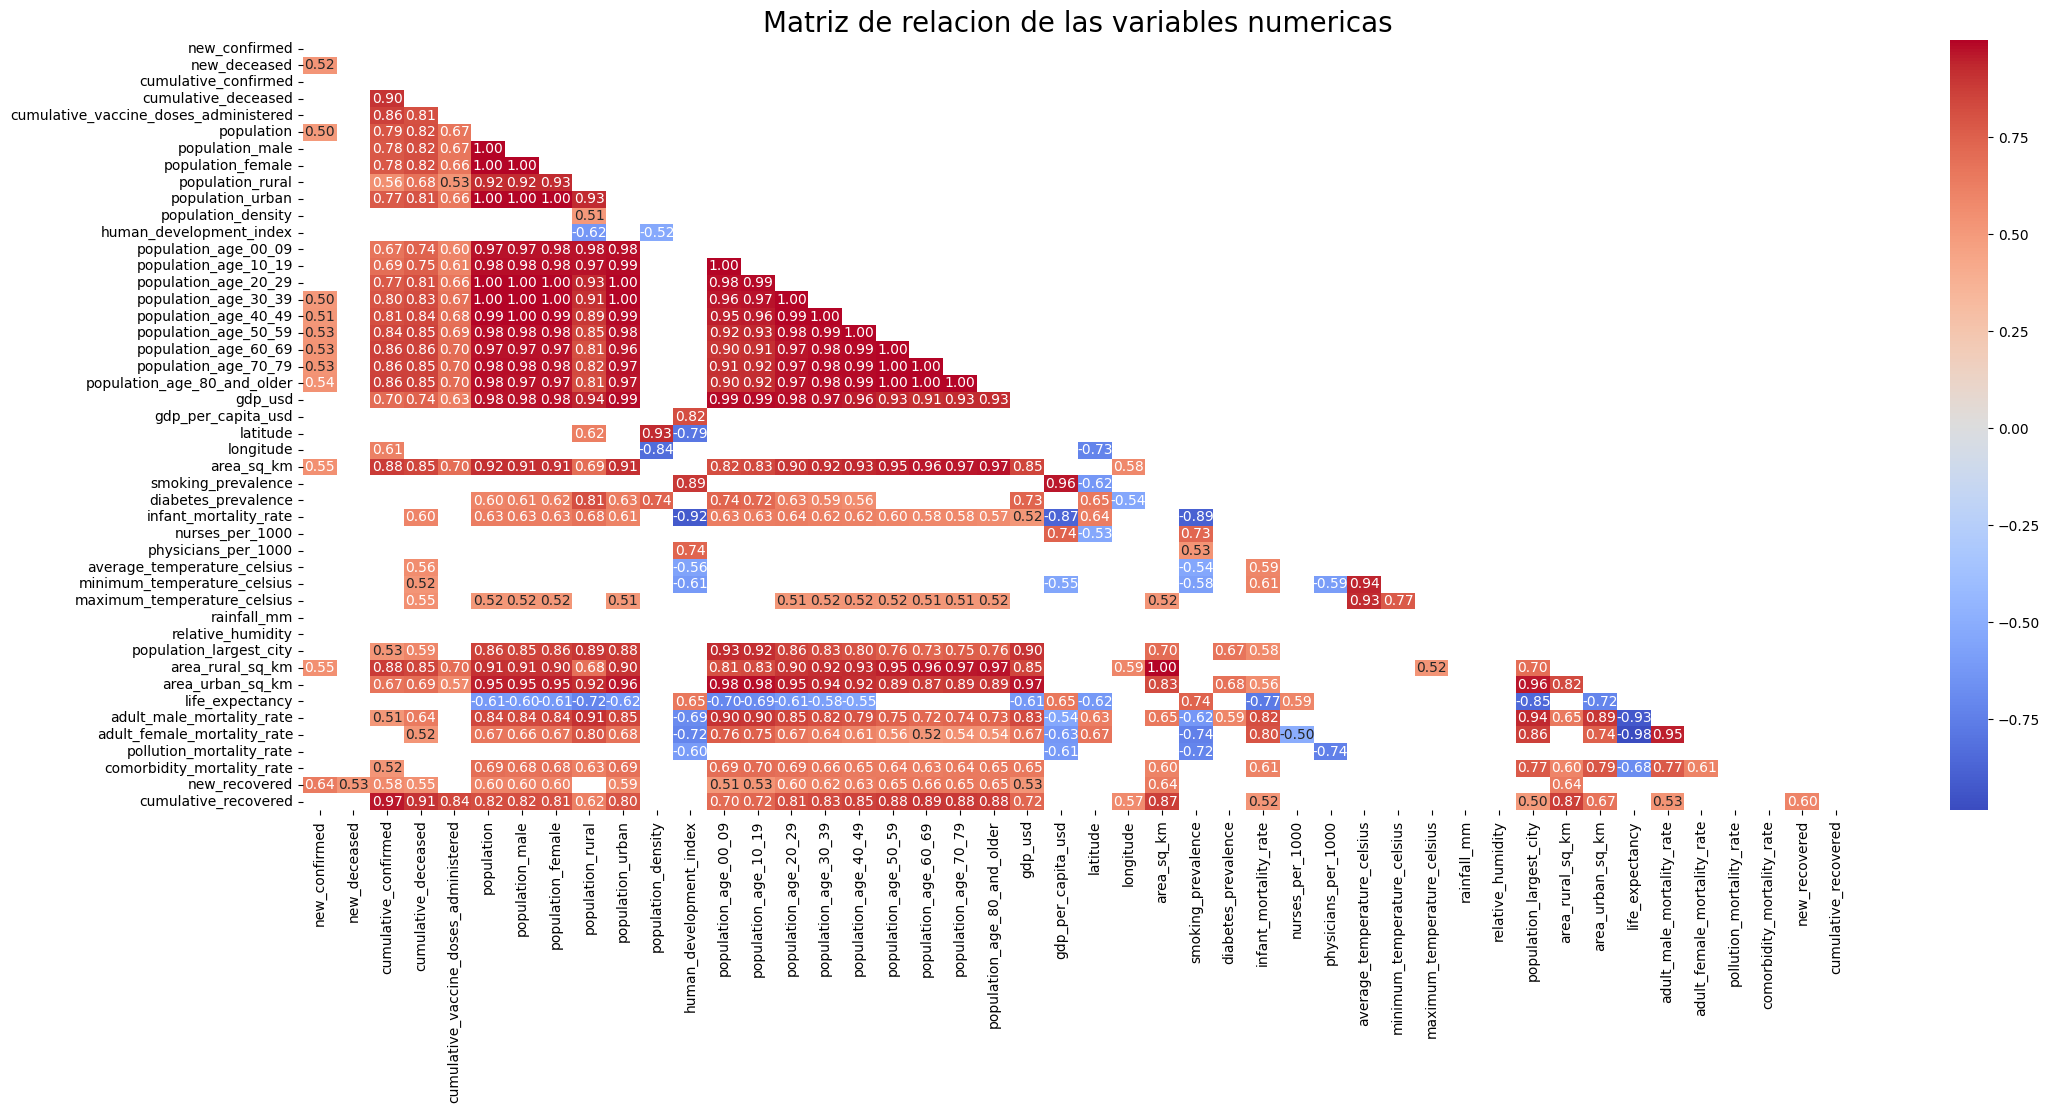

In [49]:
#Se seleccionan las columnas del dataset que contienen datos de tipo float64 o int64 (numéricos) y se almacenan en la variable numeric_columns.
numeric_columns=data_latinoamerica_paises.select_dtypes(include=['float64','int64']).columns
#Se calcula la matriz de correlación entre las columnas numéricas seleccionadas
correlation_matrix=data_latinoamerica_paises[numeric_columns].corr()
#Se crea una máscara triangular superior para la matriz de correlación que genera una matriz de unos en la parte triangular superior y ceros en la parte inferior.
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
#Se filtran las correlaciones en la matriz manteniendo solo aquellas cuya magnitud sea mayor que 0.5
correlation_matrix=correlation_matrix[abs(correlation_matrix)>abs(0.5)]

#Se crea una figura de Matplotlib con un tamaño específico de 25x10
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
# Se indica titulo del grafico y el tamño de la fuente
plt.title('Matriz de relacion de las variables numericas',fontsize=20)
plt.show()





2. Graficos de Barras

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5596\1826124502.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax=plt.subplots(figsize=(5,3))


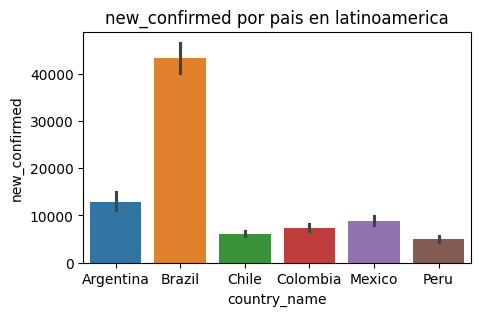

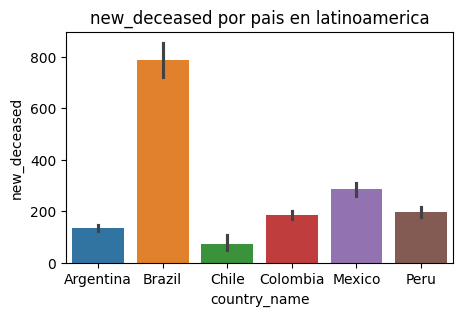

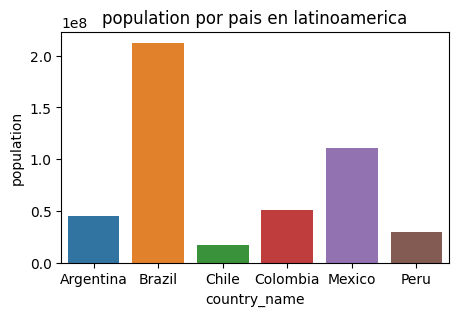

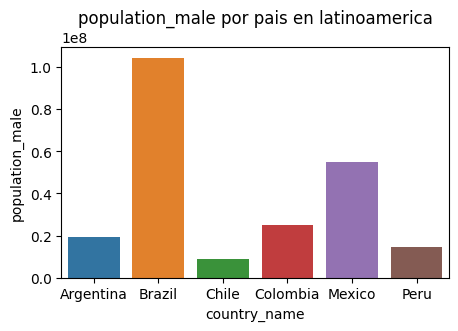

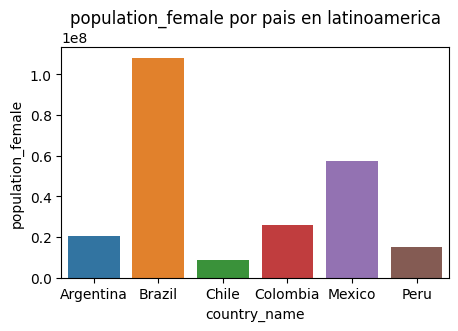

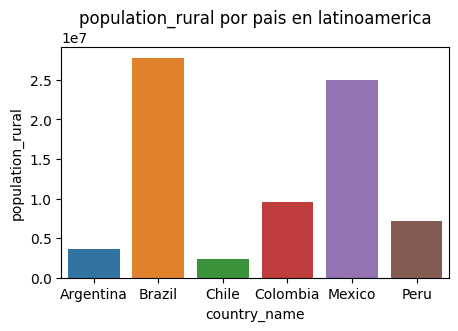

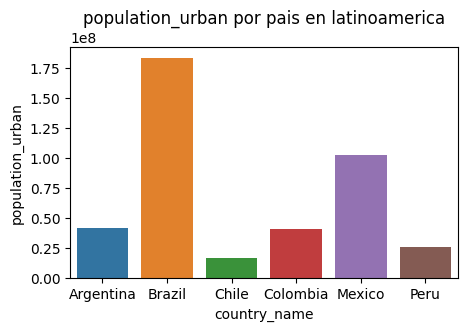

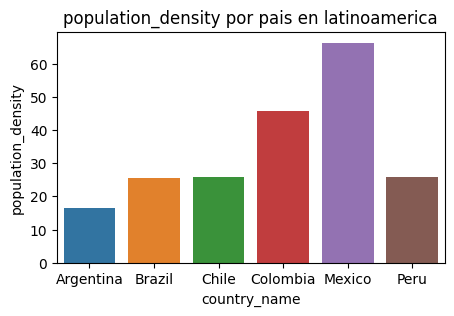

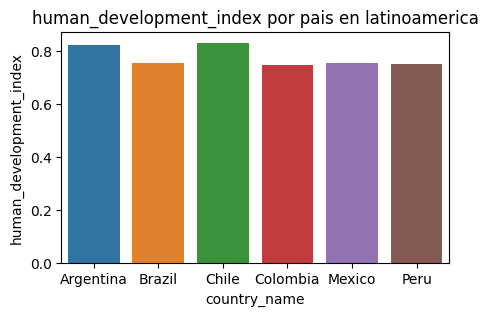

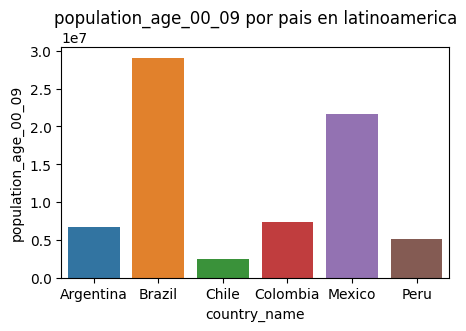

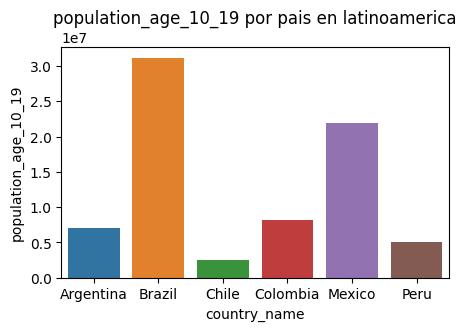

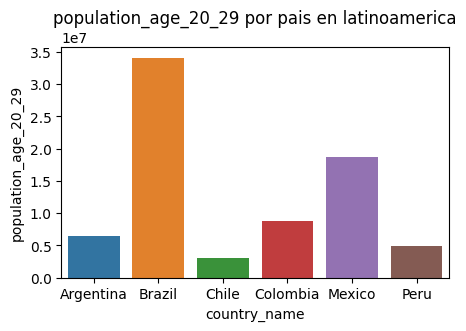

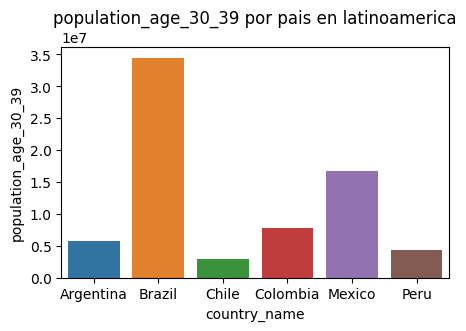

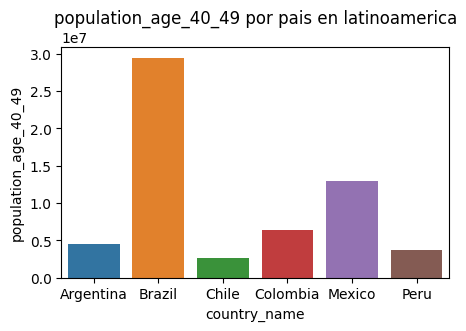

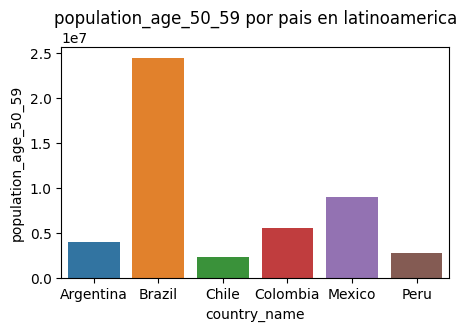

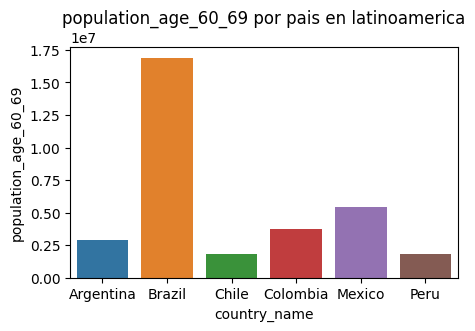

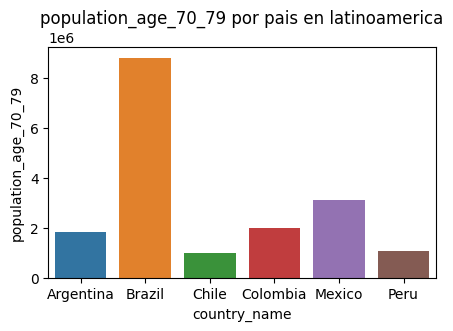

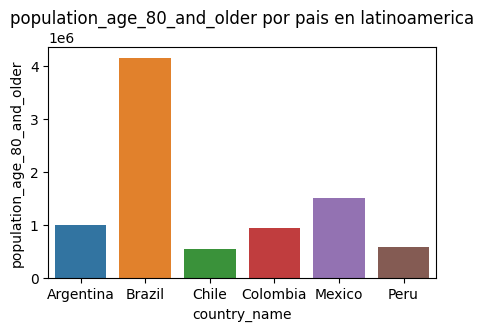

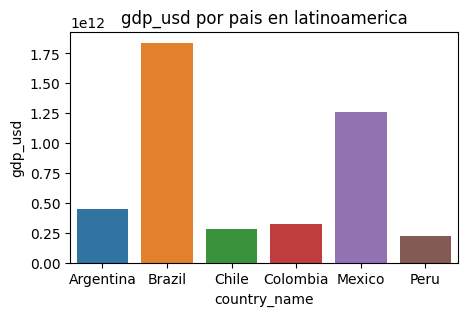

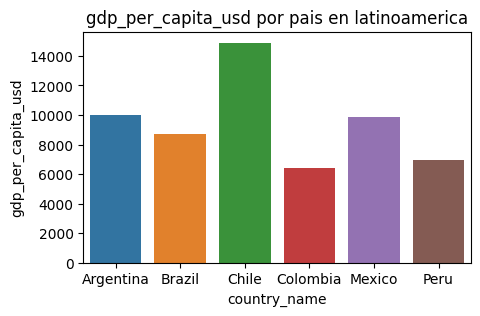

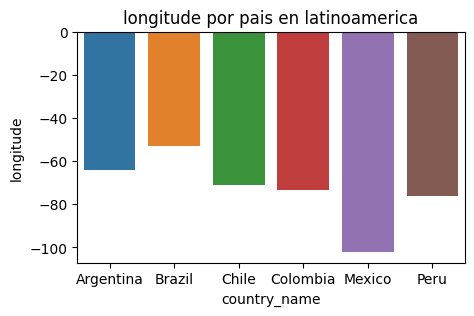

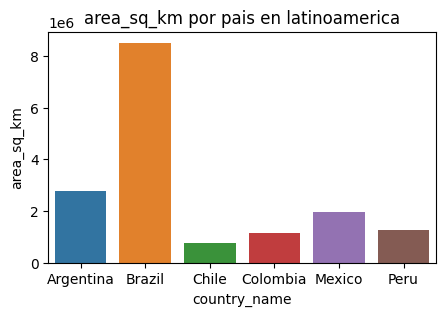

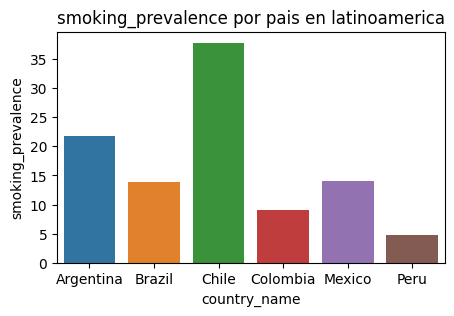

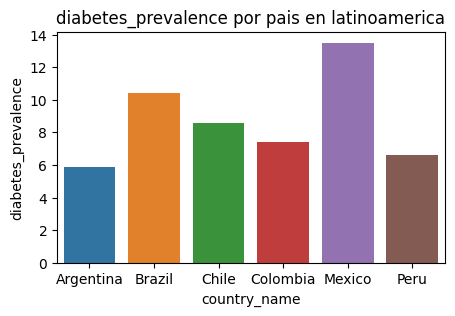

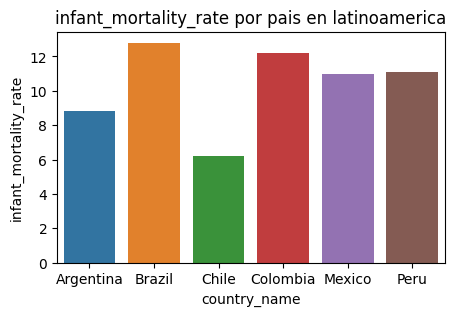

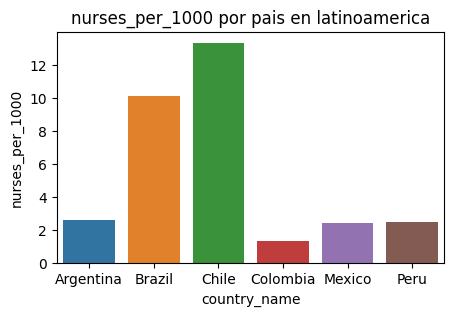

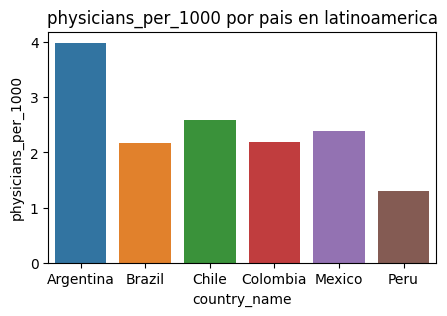

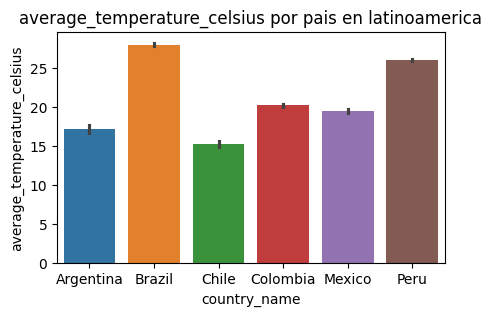

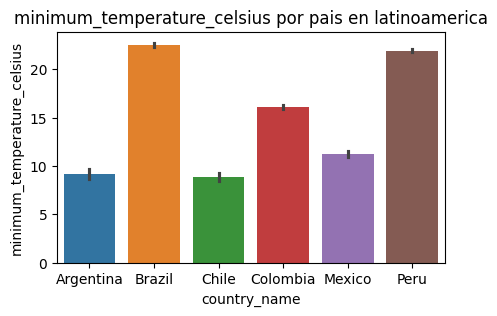

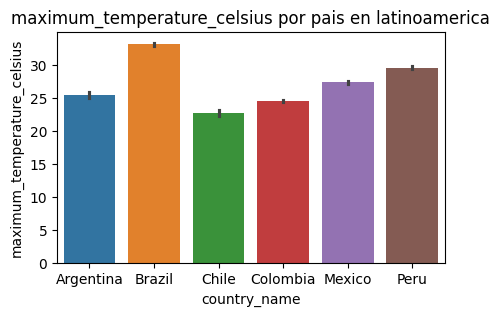

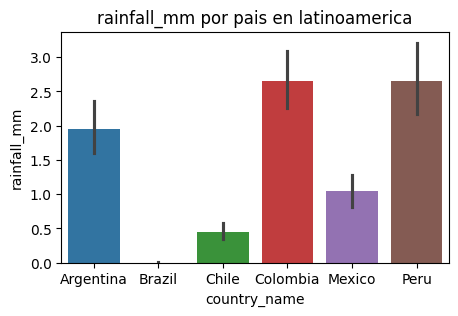

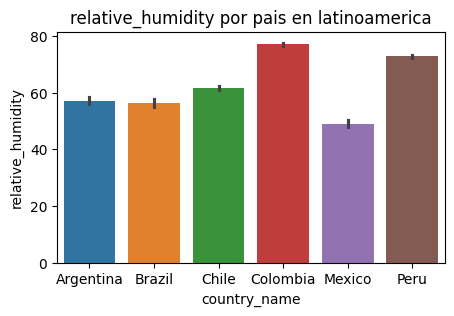

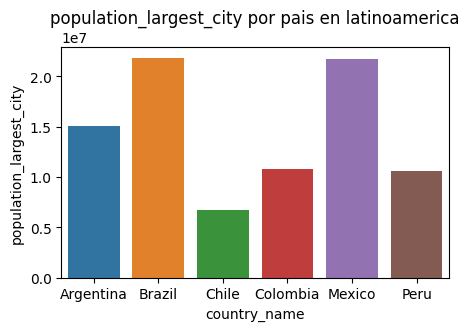

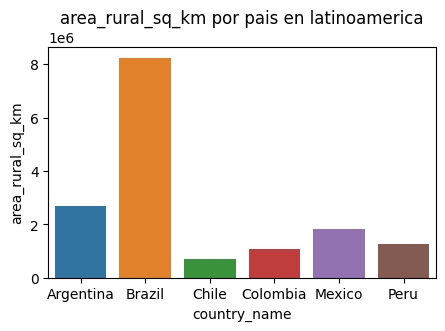

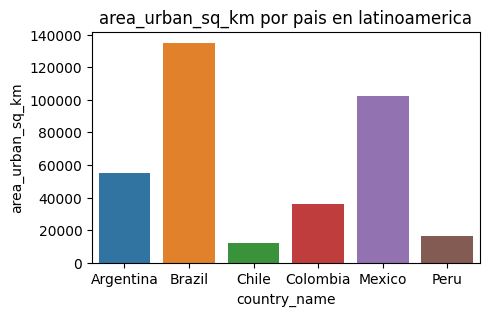

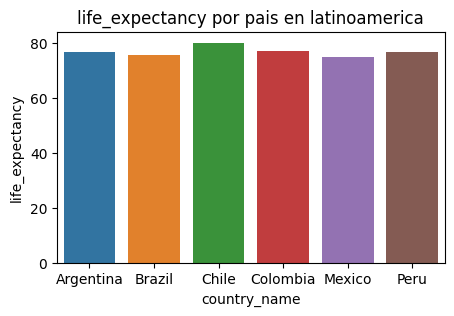

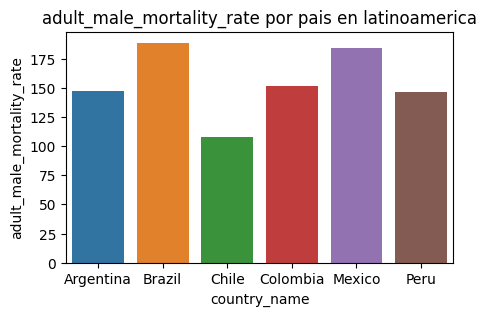

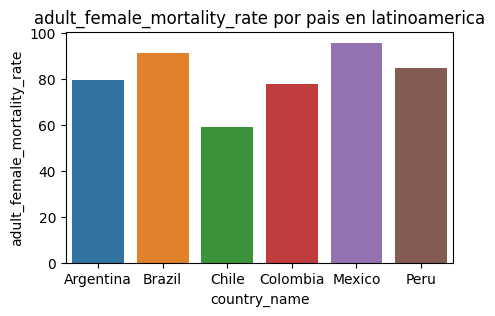

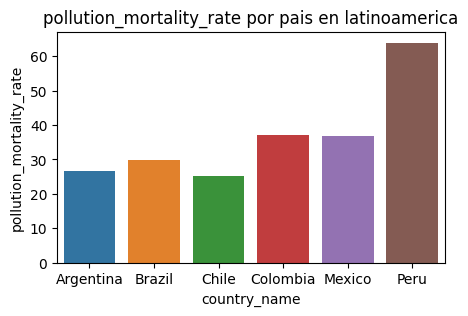

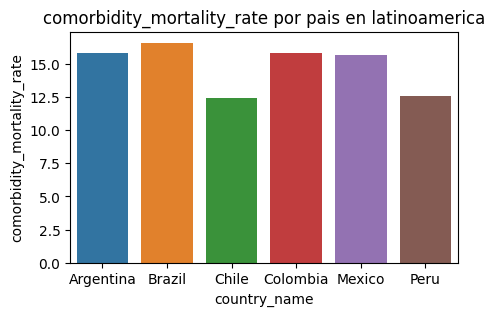

In [61]:
#Se itera sobre cada columna del data set
for i in data_latinoamerica_paises.columns:
    #Lista de columnas excluidas para la iteracion
    if i not in ['location_key','date','country_code','country_name','latitude','cumulative_confirmed','cumulative_deceased',
       'cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
        #Se crea una figura y un conjunto de ejes utilizando Matplotlib, con un tamaño específico de 5x3
        fig, ax=plt.subplots(figsize=(5,3))
        #Se crea un gráfico de barras utilizando Seaborn, especificando los datos para cada eje y diferenciacion por color para distinguir visualemnte entre paises 
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax,hue='country_name')
        plt.title(f'{i} por pais en latinoamerica')
        plt.show

3. Histogramas

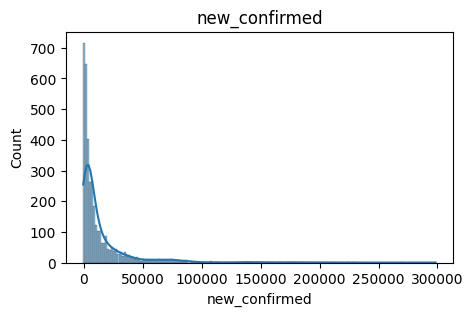

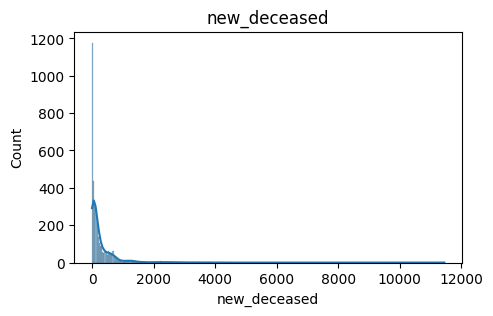

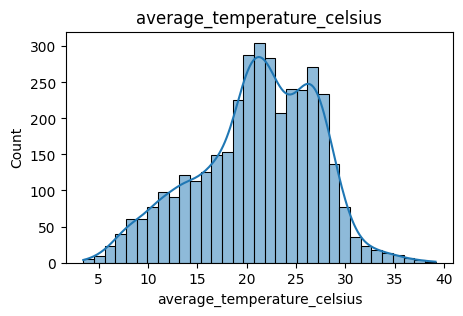

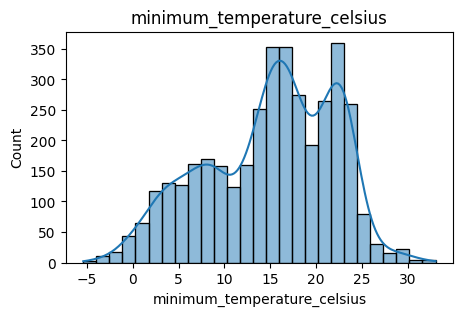

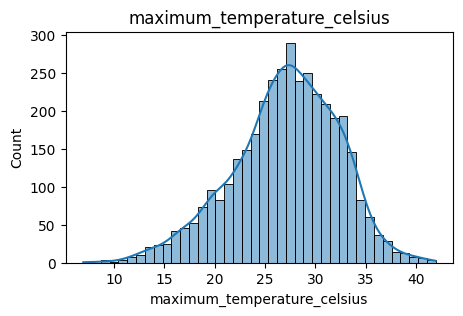

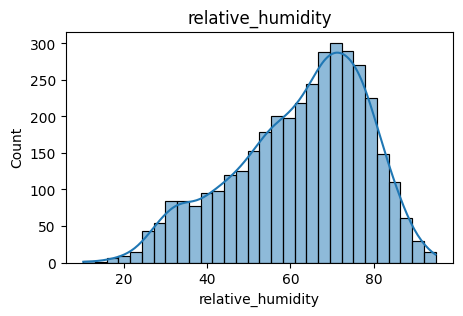

In [12]:
# Lista de columnas de interes para analizar
lista_columnas=['new_confirmed','new_deceased','average_temperature_celsius','minimum_temperature_celsius',
                'maximum_temperature_celsius','relative_humidity']
#Itera sobre cada columna en la lista de columnas seleccionadas
for i in data_latinoamerica_paises[lista_columnas]:
    #Verifica si la columna actual no esta en la lista de columnas excluidas
    if i not in ['location_key','date','country_code','country_name','latitude','cumulative_confirmed','cumulative_deceased',
       'cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
        # Crea una figura y u nconjunto de ejes con un tamaño especifico
        fig, ax=plt.subplots(figsize=(5,3))
        # Crea un histograma con una densidad de Kernel para la columna actual
        sns.histplot(data_latinoamerica_paises[i], kde=True)
        # Añade un titulo al grafico
        plt.title(i) 
        plt.show 

4. Diagrama de dispersion de la temperatura media vs casos confirmados

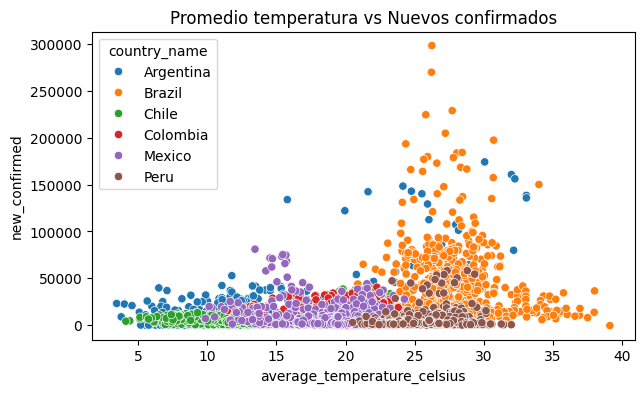

In [20]:
# Se crea una figura y un conjunto de ejes fig representa la figura y ax representan los ejes
fig, ax=plt.subplots(figsize=(7,4))
# Se crea grafico de dispersion, especificando los datos por cada eje y añadiendo color de diferenciacion
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
# Se añade titulo al grafico
plt.title('Promedio temperatura vs Nuevos confirmados')
plt.show()

5. Diagrama de dispersion de la Temperatura media vs Muertes confirmadas

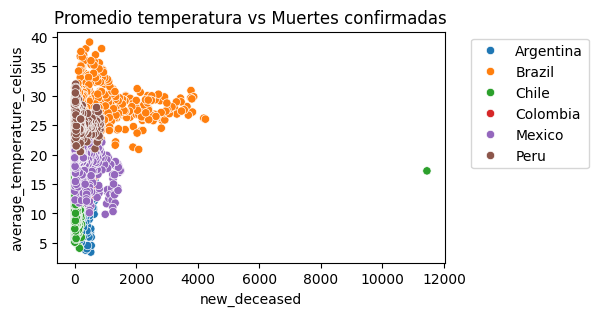

In [25]:
# Se crea una figura con un conjunto de ejes y tamaño especifico
fig, ax=plt.subplots(figsize=(5,3))
# Se crea un grafico de dispersion con paremetros como establecer los datos de cada eje
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
#Añade titulo al grafico
plt.title('Promedio temperatura vs Muertes confirmadas')
plt.show()

6. Comportamiento de las dosis administradas de todos los paises

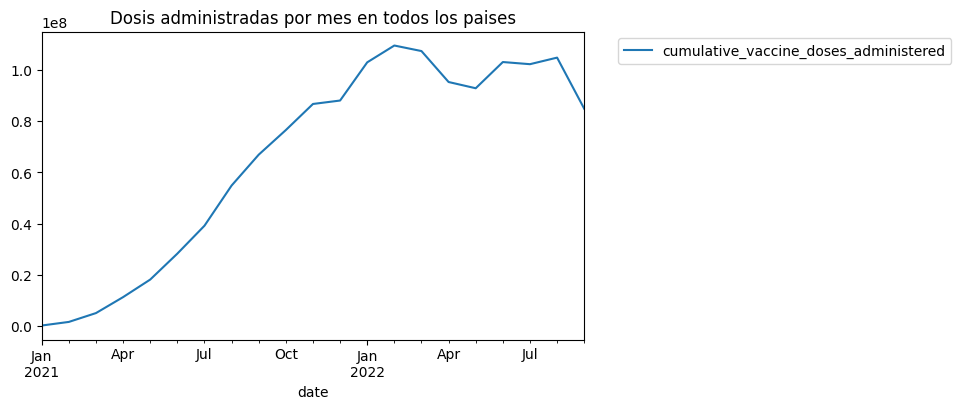

In [27]:
#Se crea una figura y un conjunto de ejes con un tamaño especifico
fig, ax=plt.subplots(figsize=(7,4))
#Se agrupan los datos del dataset por mes
data_latinoamerica_paises.resample('ME').mean (numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Dosis administradas por mes en todos los paises')
#Se utiliza para añadir una leyenda al grafico, especificando lugar y pocision de esta
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

7. Evolucion de dosis administradas por mes en cada Pais

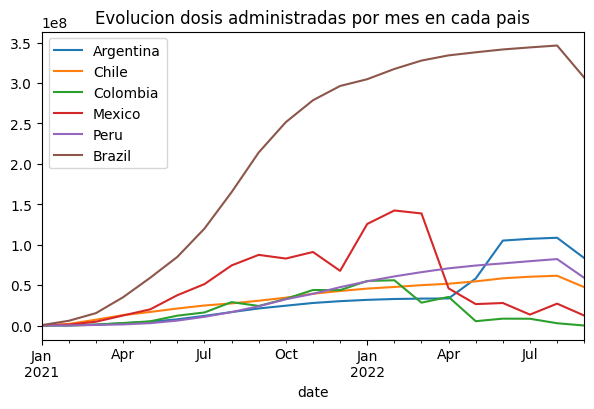

In [28]:
#Se crea una figura con un conjunto de ejes y tamaño especifico
fig, ax = plt.subplots(figsize=(7,4))
# Se itera sobre cada pais de la lista, se agrupan los datos filtrados por mes, se calcula la media de las columnas numericas
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean (numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolucion dosis administradas por mes en cada pais')
#Configuracion de la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()   


8. Muertes por mes de cada pais

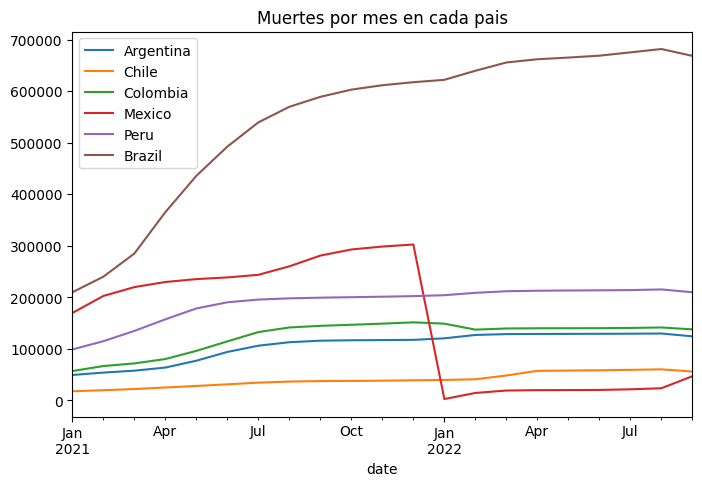

In [32]:
#Creacion de la figura y el conjunto de ejes
fig, ax = plt.subplots(figsize=(8,5))
#Iteracion sobre los paises seleccionados y generacion del grafico de lineas
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean (numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes en cada pais')
#Configuracion de la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()     

9. Casos confirmados por mes en cada pais

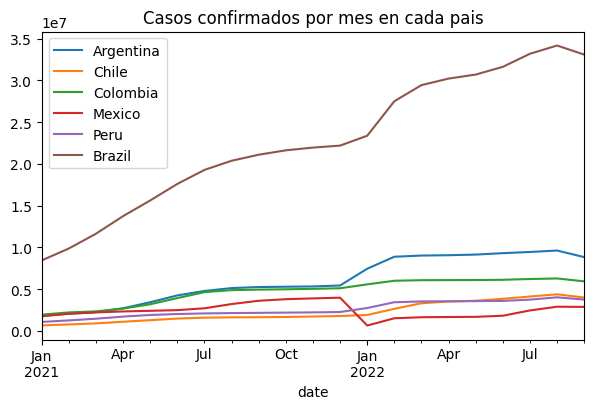

In [33]:
fig, ax = plt.subplots(figsize=(7,4))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean (numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes en cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()   

10. Recuperacion de casos por mes de cada pais

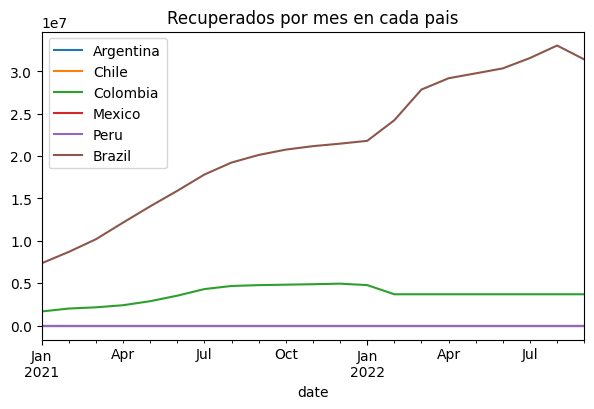

In [38]:
fig, ax = plt.subplots(figsize=(7,4))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean (numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperados por mes en cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()   

11. Comparacion del numero de casos nuevos entre paises

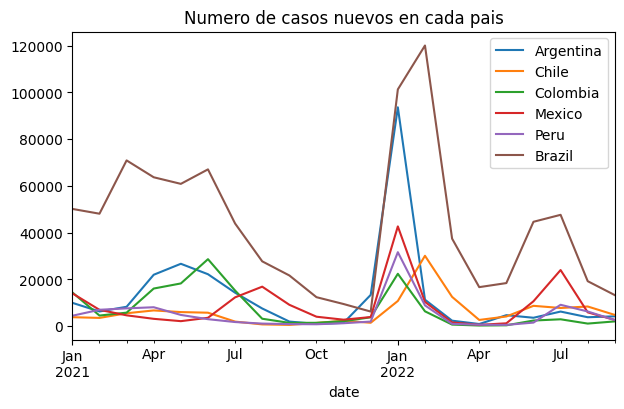

In [40]:
fig, ax = plt.subplots(figsize=(7,4))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean (numeric_only=True)['new_confirmed'].plot()
plt.title('Numero de casos nuevos en cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()   

12. Dosis acumuladas por pais

Text(0.5, 1.0, 'Dosis acumuladas por pais')

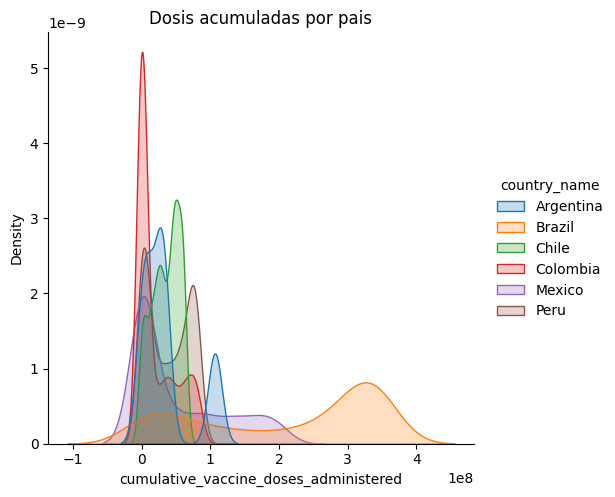

In [41]:
#Crea grafico de distribucion. diferencia las distribuciones por color
sns.displot(data_latinoamerica_paises, x='cumulative_vaccine_doses_administered', hue='country_name', kind='kde',fill=True)
plt.title('Dosis acumuladas por pais') #Agrega tirulo al grafico

13. Boxplot de temperatura media en cada pais

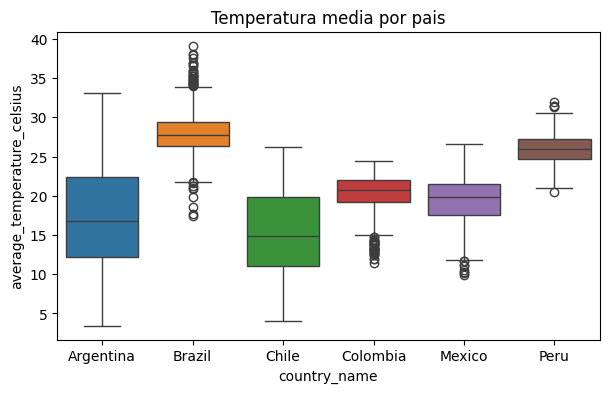

In [43]:
#Crea una figura con un conjunto de ejs y un tamaño especifico
fig, ax=plt.subplots(figsize=(7,4))
#Crea un grafico de caja con los datos en ambos ejes y especificando un color que diferencia a cada pais
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
#Agrega un titulo al grafico
plt.title('Temperatura media por pais') 
plt.show()

14. Violinplot de las variables que tienen cambios de valores

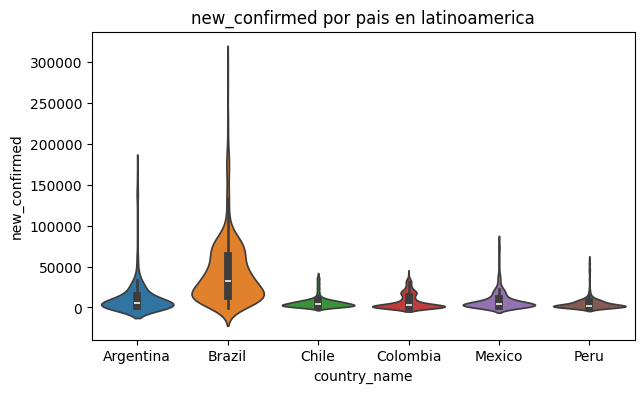

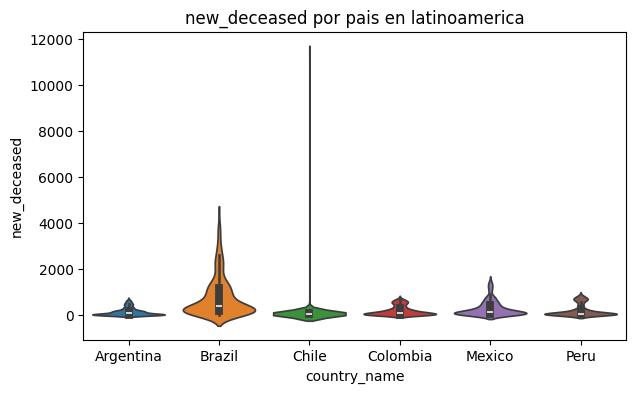

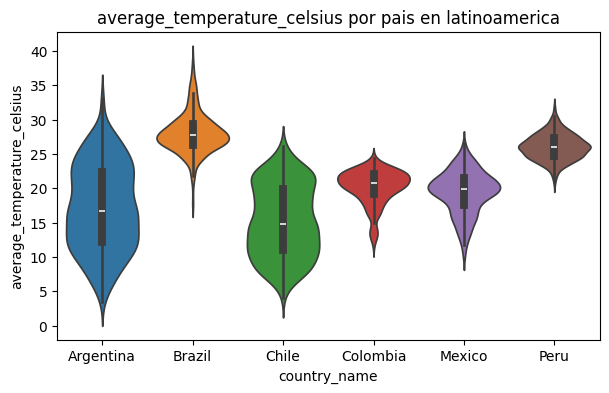

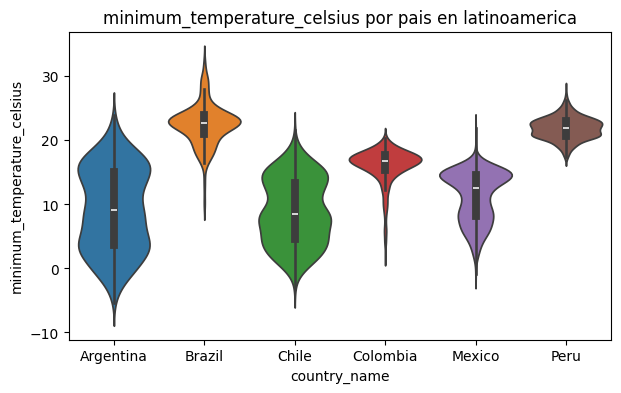

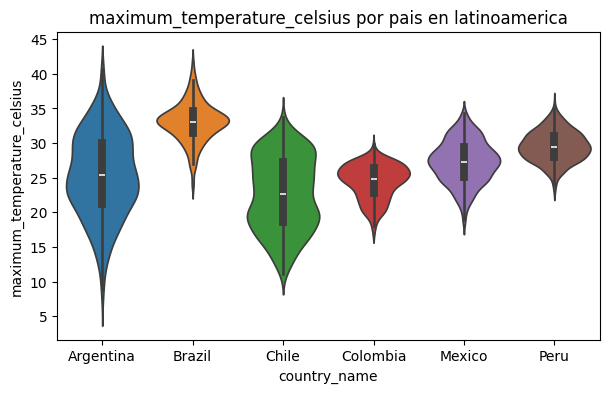

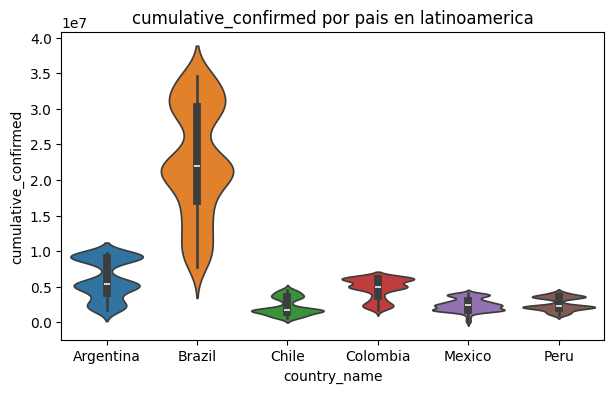

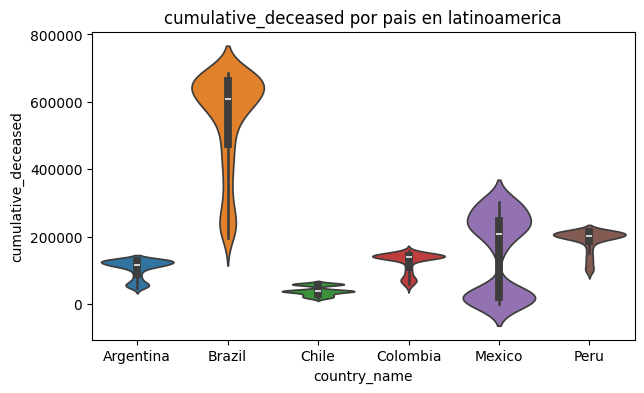

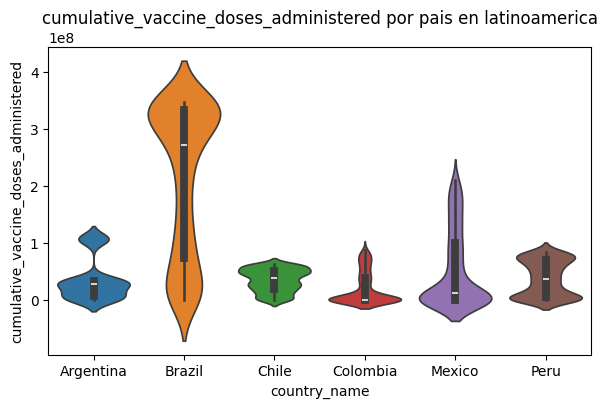

In [12]:
#Define la lista de columnas que contienen los datos a analizar
columnas_6=['new_confirmed','new_deceased','average_temperature_celsius','minimum_temperature_celsius',
            'maximum_temperature_celsius','cumulative_confirmed','cumulative_deceased',
            'cumulative_vaccine_doses_administered']
#Itera sobre cada columna en el data set
for i in data_latinoamerica_paises[columnas_6]:
    #Verifica si la columna actual no esta en la lista de columnas excluidas
    if i not in['location_key','date','country_code','latitude','longitude']:
        #Crea una figura y un conjunto de ejes y un tamaño especifico
        fig, ax=plt.subplots(figsize=(7,4))
        #Se crea un grafico violin definiendo las variables de cada eje y añade una variable de agrupacion y colorea segun el pais
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax,hue='country_name')
        plt.title(f'{i} por pais en latinoamerica')
        plt.show

15. Distribucion de la poblacion por grupo de edad

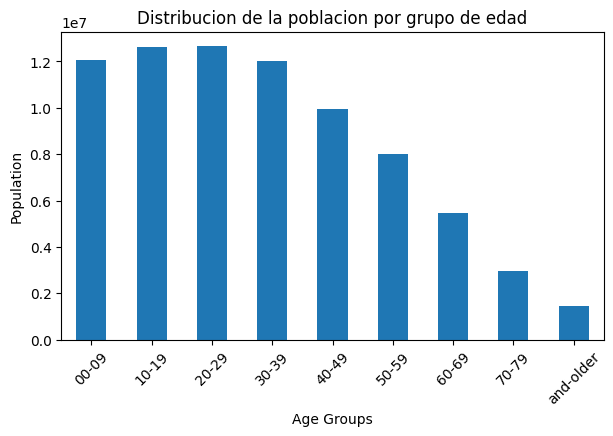

In [61]:
#Define una lista de columnas que representan diferentes rangos de edades de la poblacion
age_columns=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39',
            'population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79',
            'population_age_80_and_older']
#Calcula la media de la distribucion de la poblacion para grupo de edad
age_distribution=data_latinoamerica_paises[age_columns].mean()
#Crea la figura con un tamaño especifico
plt.figure(figsize=(7,4))
#Especifica que se quiere un grafico de barras e indica que las barras seran apiladas en este caso no es necesario porque solo es una serie
age_distribution.plot(kind='bar', stacked=True)
#Añade una etiqueta al eje x
plt.xlabel('Age Groups')
#Añade una etiqueta al eje y
plt.ylabel('Population')
plt.title('Distribucion de la poblacion por grupo de edad')
#Personaliza las etiquetas del eje y
plt.xticks(range(len(age_columns)),[col.split('_')[-2]+'-'+col.split('_')[-1] for col in age_columns],rotation=45)
plt.show()

16. Diagrama de Barras apilado de comparacion de la tasa de mortalidad masculina vs. femenina

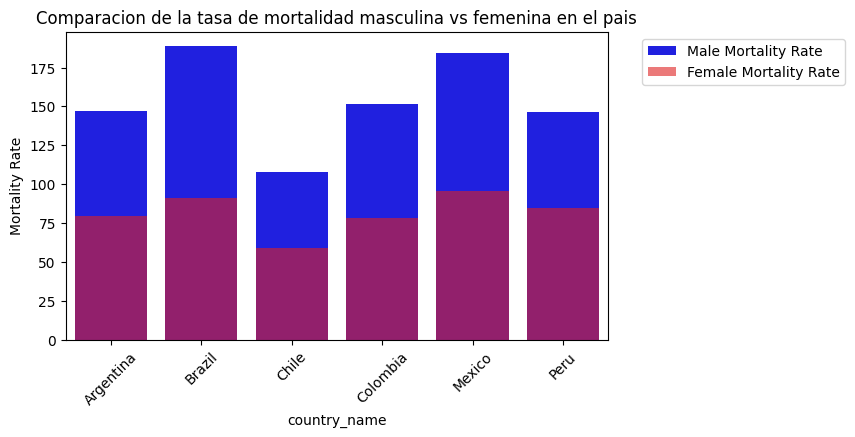

In [62]:
#Crea una figura con un tamaño especifico
plt.figure(figsize=(7,4))
#Crea un grafico de barras para la mortalidad masculina, establciendo un color y proporciona una etiqueta para la lyenda
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
#Crea un grafico de barras para la mortalidad femenina, estableciendo un color y proporciona una etiqueta
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
#Rota las etiquetas del eje x45 grados para mejor legibilidad
plt.xticks(rotation=45)
#Añade una etiqueta al eje y
plt.ylabel('Mortality Rate')
plt.title('Comparacion de la tasa de mortalidad masculina vs femenina en el pais')
#Añade una leyenda fuera de grafico
plt.legend(bbox_to_anchor=[1.05, 1], loc='upper left')
plt.show()


17. Matrix de correlacion de indicadores demograficos y de salud

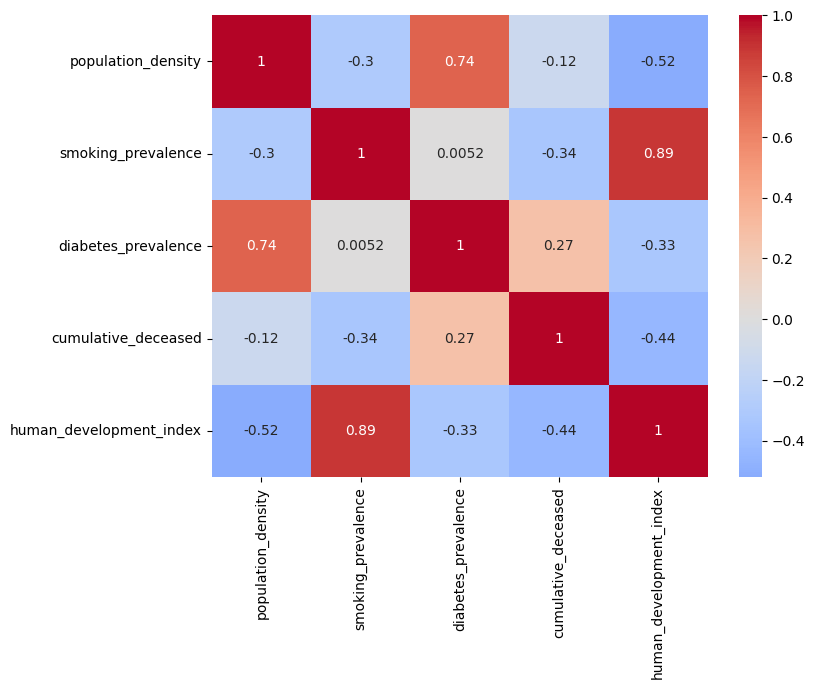

In [66]:
#Define una lista de columnas que representan diferentes indicadores 
columns=['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
#Calcula la matrix de correlacion para las columnas especificadas
correlation_matrix=data_latinoamerica_paises[columns].corr()
#Crea una figura con un tamaño especifico
plt.figure(figsize=(8,6))
#Genera un mapa de calor, proporciona los datos, añade valores de correlacion, especifica el esquema de colores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)
plt.title=('Matrix correlacion de Indicadores demograficos y de salud')
plt.show()


18. Comparacion de la prevalencia de diabetes y la tasa de mortalidad

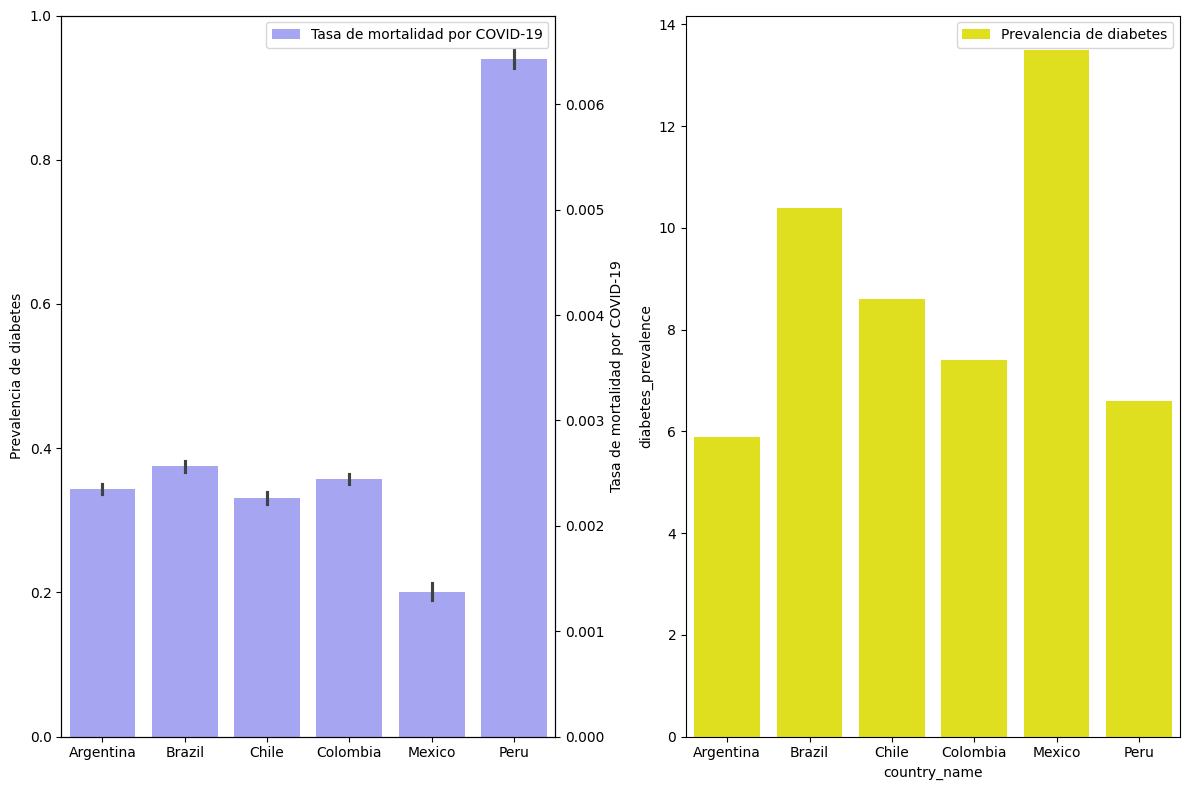

In [78]:
# Crear una figura con dos subgráficos (ax y ax2) en una fila y dos columnas, con un tamaño específico
fig, (ax,ax2)=plt.subplots(1, 2, figsize=(12,8))
# Crear un gráfico de barras utilizando seaborn para la prevalencia de diabetes, establece color de las barras, proporciona unaleyenda
sns.barplot(data=data_latinoamerica_paises, x= data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['diabetes_prevalence'], color='yellow', label='Prevalencia de diabetes')
# Crear un segundo eje y para el primer subgráfico (ax)
ax2=ax.twinx()
# Crear un gráfico de barras utilizando seaborn para la tasa de mortalidad por COVID-19, establece color de las barras, proporciona una leyenda
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['population'], color='Blue', label='Tasa de mortalidad por COVID-19', ax=ax2, alpha=0.4)
# Rotar las etiquetas del eje x 90 grados para mejor legibilidad
plt.xticks(rotation=90)
# Añadir una etiqueta al eje y del primer subgráfico (ax)
ax.set_ylabel('Prevalencia de diabetes')
# Añadir una etiqueta al eje y del segundo subgráfico (ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')
#Ajustar el diseño del gráfico para que los subgráficos no se solapen
plt.tight_layout()
plt.show()

##### AVANCE 3

1. Evolucion de Casos Activos vs Recuperados

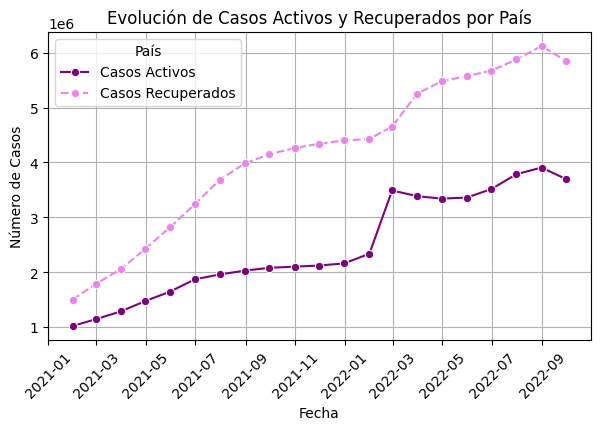

In [45]:
#Esta línea calcula el número de casos activos restando los casos confirmados acumulativos, los fallecimientos acumulativos y los recuperados acumulativos.
data_latinoamerica_paises['active_cases']=data_latinoamerica_paises['cumulative_confirmed']-data_latinoamerica_paises['cumulative_deceased']-data_latinoamerica_paises['cumulative_recovered']
#Crea una nueva figura de tamaño 7x4 pulgadas para el gráfico
plt.figure(figsize=(7, 4))
#Crea un gráfico de líneas utilizando seaborn (sns) con los datos de casos activos por fecha ('date') usando un marcador circular ('marker='o''), un estilo de línea sólida ('linestyle='-'''), color púrpura ('color='purple'') y etiquetado como 'Casos Activos'.
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', marker='o', linestyle='-', color='purple', label='Casos Activos')
#Crea otro gráfico de líneas para casos recuperados con un estilo de línea punteado ('linestyle='--''), color violeta ('color='violet'') y etiquetado como 'Casos Recuperados'. El parámetro legend=False indica que no se muestre la leyenda automáticamente para este gráfico.
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', marker='o', linestyle='--', color='violet', label='Casos Recuperados', legend=False)
#Establece el título del gráfico como 'Evolución de Casos Activos y Recuperados por País'.
plt.title('Evolución de Casos Activos y Recuperados por País')
plt.xlabel('Fecha') #Etiqueta el eje x como 'Fecha'.
plt.ylabel('Número de Casos') #Etiqueta el eje y como 'Número de Casos'.
plt.xticks(rotation=45) #Rota las etiquetas del eje x 45 grados para una mejor visualización.
plt.legend(title='País') #Agrega una leyenda al gráfico con el título 'País'.
plt.grid(True) #Muestra una cuadrícula en el gráfico.
plt.show() # Muestra el gráfico.

 La línea de casos recuperados muestra la cantidad de personas que se han recuperado de la enfermedad a lo largo del tiempo. Esta línea tiende a aumentar gradualmente a medida que más personas se recuperan y reciben el alta médica. Se pueden identificar picos o descensos significativos en la cantidad de casos activos en ciertos períodos, 

2. Relacion entre la cobertura de vacunacion y la reduccion de casos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10436\1297029981.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='violet', label='Casos Nuevos')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10436\1297029981.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='purple', label='Porcentaje de la poblacion vacunada')


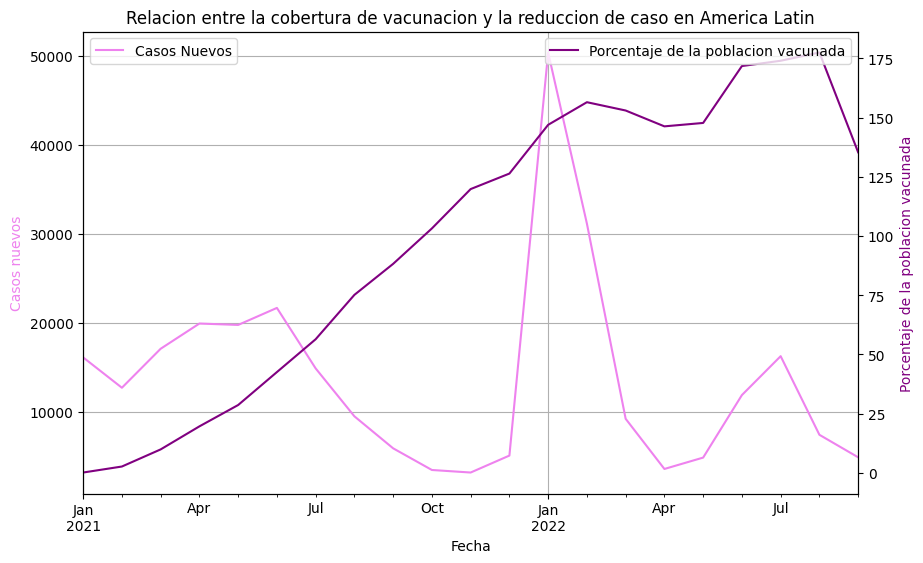

In [46]:
plt.figure(figsize=(10,6)) #Crea una nueva figura con un tamaño de 10x6 pulgadas para el gráfico.
ax1=plt.gca() # Obtiene el eje actual (ax1) para el primer conjunto de datos (casos nuevos).
ax2=ax1.twinx() # Crea un segundo eje (ax2) que comparte el eje x con ax1, pero tendrá su propio eje y, permitiendo superponer dos gráficos con diferentes escalas y unidades en el mismo gráfico.
#Calcula el porcentaje de la población vacunada dividiendo las dosis de vacunas administradas acumuladas entre la población total y multiplicando por 100.
data_latinoamerica_paises['percentage_vaccinated']=(data_latinoamerica_paises['cumulative_vaccine_doses_administered']/data_latinoamerica_paises['population'])*100
#Agrupa los datos mensualmente ('M'), calcula el promedio de los casos nuevos confirmados y los grafica en el primer eje (ax1) con color violeta y etiqueta 'Casos Nuevos'.
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='violet', label='Casos Nuevos')
#Agrupa los datos mensualmente, calcula el promedio del porcentaje de la población vacunada y los grafica en el segundo eje (ax2) con color púrpura y etiqueta 'Porcentaje de la población vacunada'.
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='purple', label='Porcentaje de la poblacion vacunada')


ax1.set_xlabel('Fecha') #Establece la etiqueta del eje x como 'Fecha'.
ax1.set_ylabel('Casos nuevos', color='violet') # Establece la etiqueta del eje y del primer eje (ax1) como 'Casos nuevos' con color violeta.
ax2.set_ylabel('Porcentaje de la poblacion vacunada', color='purple') #Establece la etiqueta del eje y del segundo eje (ax2) como 'Porcentaje de la población vacunada' con color púrpura.
ax1.set_title('Relacion entre la cobertura de vacunacion y la reduccion de caso en America Latin') # Establece el título del gráfico.
ax1.grid(True) # Muestra una cuadrícula en el gráfico.
ax1.legend(loc='upper left') #Coloca la leyenda del primer eje en la esquina superior izquierda.
ax2.legend(loc='upper right') #Coloca la leyenda del segundo eje en la esquina superior derecha.
plt.show()

Observa cómo la línea del porcentaje de la población vacunada se comporta en relación con los cambios en la línea de los casos nuevos. 

In [37]:
data_latinoamerica_paises.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17'],
              dtype='datetime64[ns]', name='date', length=3744, freq=None)

3. Progreso de la vacunacion por pais

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6288\427964488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vaccination_data.values, y=vaccination_data.index, palette='pastel')


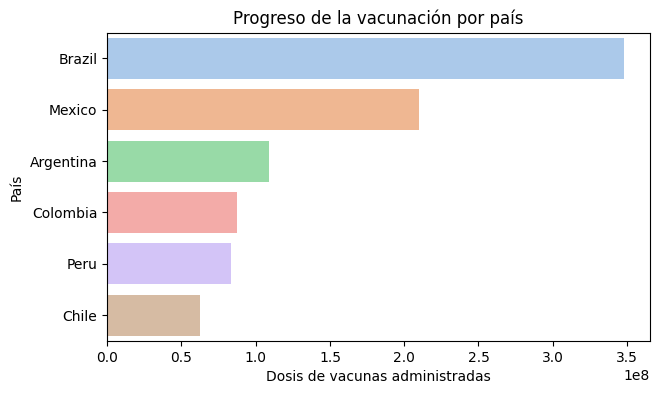

In [45]:
# Agrupar los datos por país y obtener el número máximo de dosis administradas
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Configurar el tamaño de la figura
plt.figure(figsize=[7, 4])

# Crear un gráfico de barras horizontales
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, palette='pastel')

# Etiquetas del gráfico
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

# Mostrar el gráfico
plt.show()

Los países en la parte superior del gráfico son aquellos que han administrado la mayor cantidad de dosis de vacunas
Esto refleja el progreso y la capacidad de vacunación de cada país.

In [39]:
data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date',inplace=True)

4. Nuevos casos y temperatura promedio

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10436\1482419712.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax1.plot(data_pais.resample('M').mean(numeric_only=True).index,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10436\1482419712.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais.resample('M').mean(numeric_only=True)['new_confirmed'],
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10436\1482419712.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax2.plot(data_pais.resample('M').mean(numeric_only=True).index,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10436\1482419712.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais.resample('M').mean(numeric_only=True)['average_temperature_celsius'],


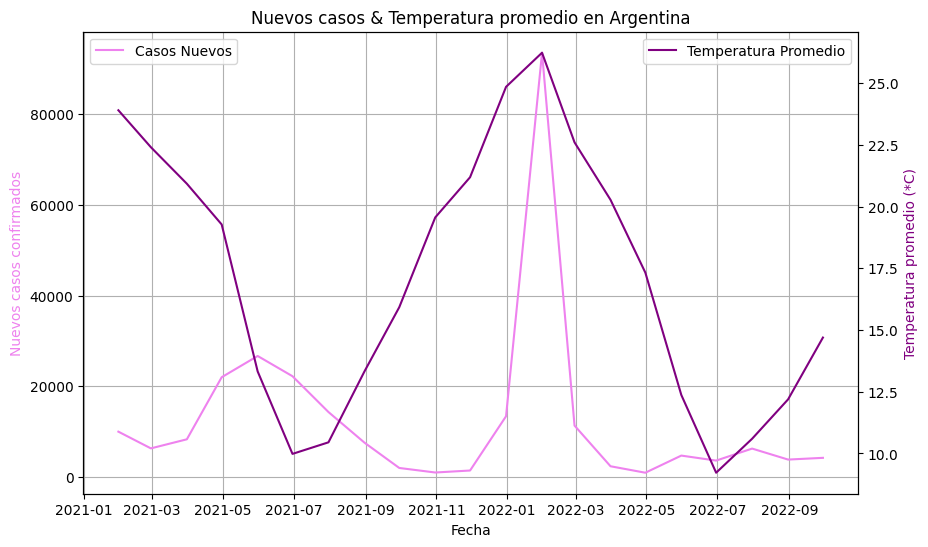

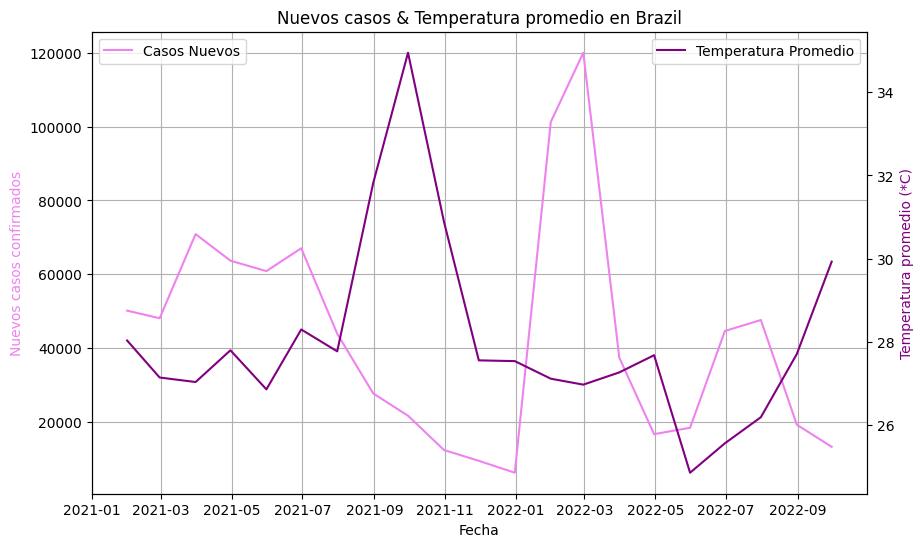

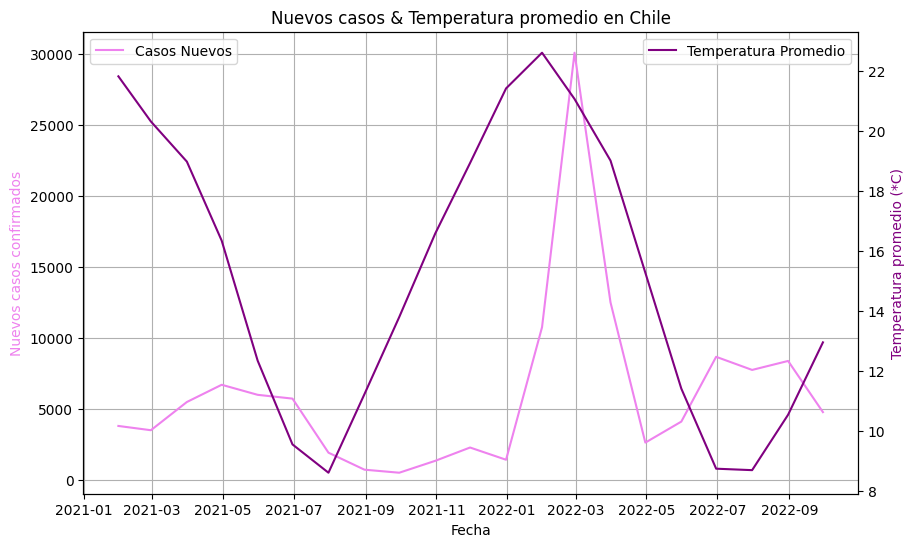

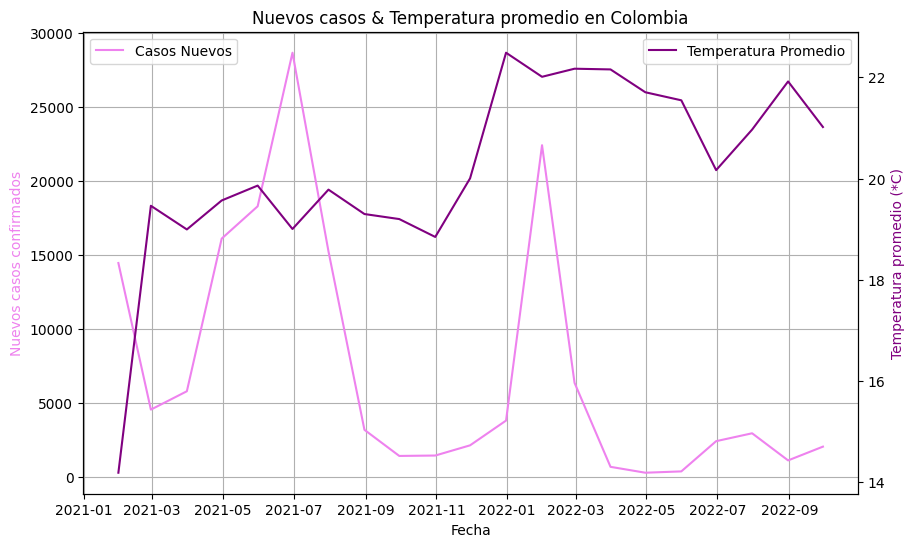

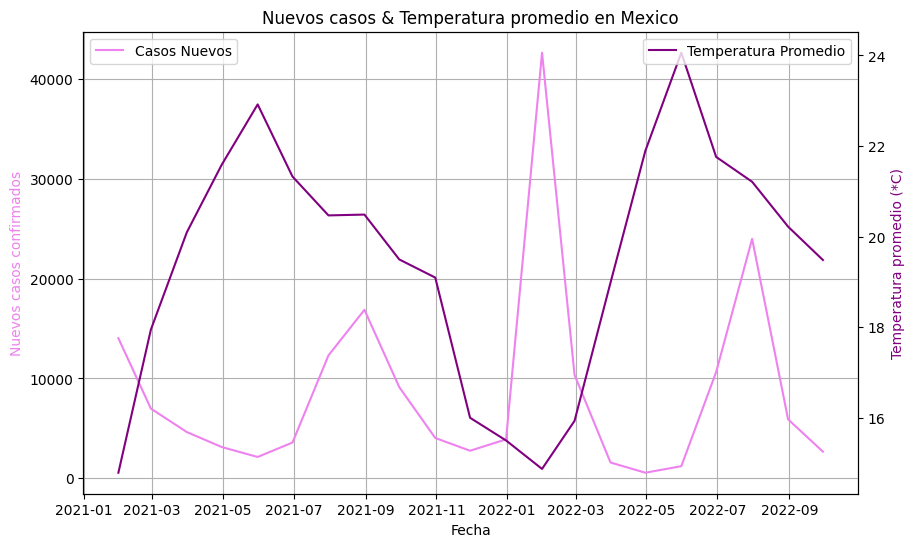

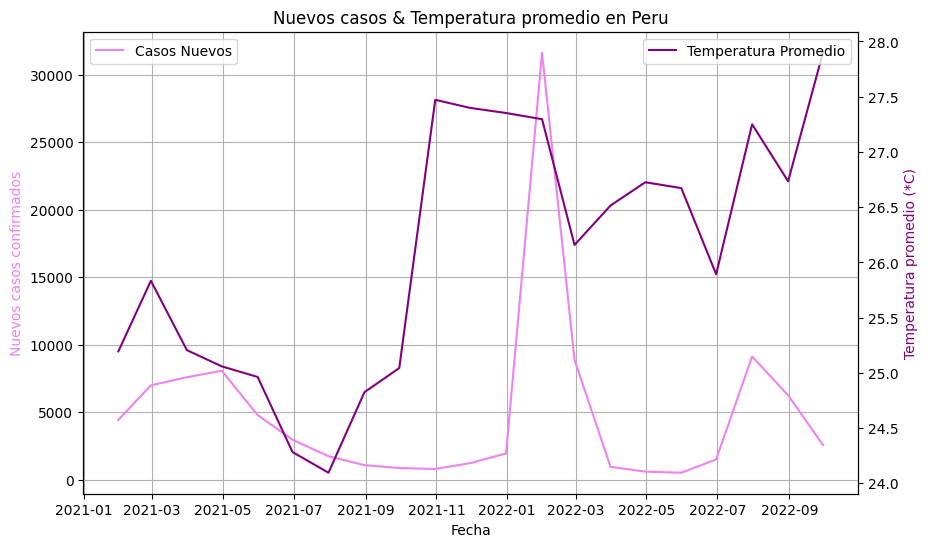

In [50]:
#Se obtiene una lista de los nombres únicos de los países presentes en el conjunto de datos
paises = data_latinoamerica_paises['country_name'].unique()
#Se itera sobre cada país en la lista paises, se filtran los datos para cada país, creando un subconjunto de datos (data_pais) específico para el país en la iteración actual.
for pais in paises:
    data_pais = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    
    plt.figure(figsize=(10, 6)) #Se configura el tamaño del gráfico a 10x6 pulgadas.
    ax1 = plt.gca() #Se obtiene el eje actual (ax1) para el primer conjunto de datos (nuevos casos confirmados).
    ax2 = ax1.twinx() #Se crea un segundo eje (ax2) que comparte el eje x con ax1, pero tendrá su propio eje y, permitiendo superponer dos gráficos con diferentes escalas y unidades en el mismo gráfico.
    #Se re-muestrean los datos mensualmente ('M'), calculando el promedio de los nuevos casos confirmados y la temperatura promedio.
    ax1.plot(data_pais.resample('M').mean(numeric_only=True).index, 
             data_pais.resample('M').mean(numeric_only=True)['new_confirmed'], 
             color='violet', label='Casos Nuevos') #Se crea un gráfico de líneas para los nuevos casos confirmados en el eje ax1 (color violeta).
    ax2.plot(data_pais.resample('M').mean(numeric_only=True).index, 
             data_pais.resample('M').mean(numeric_only=True)['average_temperature_celsius'], 
             color='purple', label='Temperatura Promedio') #Se crea un gráfico de líneas para la temperatura promedio en el eje ax2 (color púrpura).

    ax1.set_xlabel('Fecha') #Se establece la etiqueta del eje x como 'Fecha'.
    ax1.set_ylabel('Nuevos casos confirmados', color='violet') #Se establece la etiqueta del eje y del primer eje (ax1) como 'Nuevos casos confirmados' con color violeta.
    ax2.set_ylabel('Temperatura promedio (*C)', color='purple') #Se establece la etiqueta del eje y del segundo eje (ax2) como 'Temperatura promedio (*C)' con color púrpura.
    ax1.set_title(f'Nuevos casos & Temperatura promedio en {pais}') #Se establece el título del gráfico utilizando el nombre del país actual (pais).
    ax1.grid(True)#Se muestra una cuadrícula en el gráfico.
    ax1.legend(loc='upper left') #Se coloca la leyenda del primer eje en la esquina superior izquierda.
    ax2.legend(loc='upper right') #Se coloca la leyenda del segundo eje en la esquina superior derecha.
    plt.show()

Correlación entre Temperatura y Casos: En algunos países, puede observarse una correlación entre la temperatura y los nuevos casos, lo que sugiere que el clima puede influir en la propagación del virus.

5. Impacto de la urbanizacion en la propagacion del covid-19

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6288\436472362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='pastel')


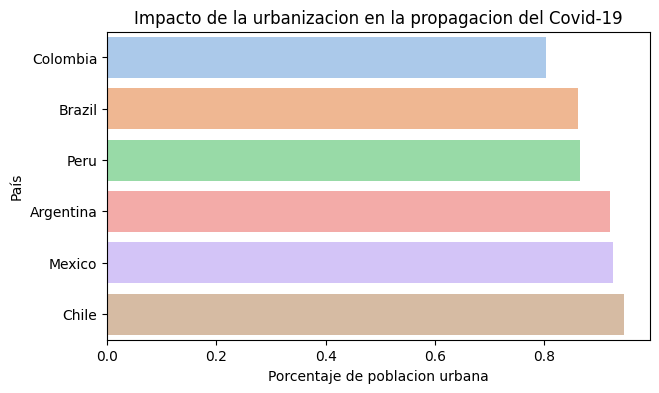

In [50]:
#Se calcula el porcentaje de la población urbana dividiendo la población urbana entre la población total para cada país en el dataset.
data_latinoamerica_paises['urban_population_percentage']=data_latinoamerica_paises['population_urban']/ data_latinoamerica_paises['population']
#Se agrupan los datos por nombre de país y se toma el último registro (última fecha disponible) para cada país,luego, se ordenan los países según su porcentaje de población urbana de menor a mayor.
urban_cases=data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
#Se configura el tamaño del gráfico a 7x4 pulgadas.
plt.figure(figsize=[7, 4])
#Se crea un gráfico de barras horizontales utilizando seaborn (sns).
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='pastel')


plt.xlabel('Porcentaje de poblacion urbana') #Se etiqueta el eje x como 'Porcentaje de población urbana'.
plt.ylabel('País') #Se etiqueta el eje y como 'País'.
plt.title('Impacto de la urbanizacion en la propagacion del Covid-19') #Se establece el título del gráfico como 'Impacto de la urbanización en la propagación del Covid-19'.


plt.show()

6. Evolucion semanal de casos nuevos

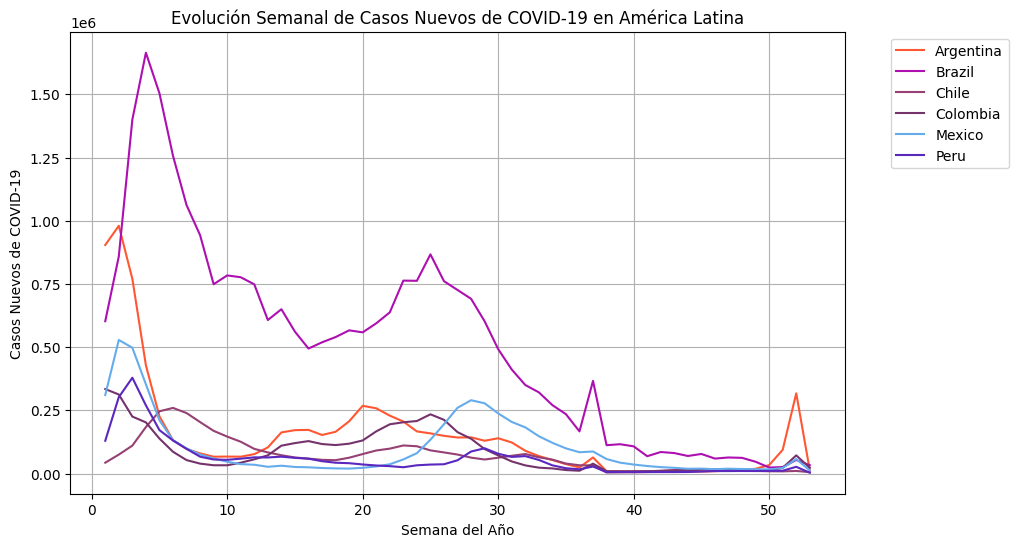

In [65]:
#Transformacion de indice a formato fecha
data_latinoamerica_paises.index = pd.to_datetime(data_latinoamerica_paises.index)
#Se calculan las semanas y años correspondientes a cada fecha en el DataFrame utilizando el método isocalendar() de Pandas.
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises['year'] = data_latinoamerica_paises.index.isocalendar().year

#Se agrupan los datos por país y semana, sumando los nuevos casos confirmados de cada semana para obtener un total semanal de casos.
weekly_cases = data_latinoamerica_paises.groupby(['country_name', 'week'])[['new_confirmed']].sum().reset_index()

#Se crea una lista de colores y un diccionario que asigna un color a cada país en base a la lista de países únicos en weekly_cases.
colors = ['#FF5733', '#AD0FB1', '#964073', '#75336C', '#65ACED', '#5A27BF']
color_dict = {country: colors[i % len(colors)] for i, country in enumerate(weekly_cases['country_name'].unique())}
#Se crea un gráfico de líneas donde cada línea representa la evolución semanal de los nuevos casos confirmados de Covid-19 para un país específico en América Latina.
plt.figure(figsize=[10, 6])
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country, color=color_dict[country])

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Se pueden identificar brotes o aumentos significativos en la transmisión del virus a través de picos en las líneas de casos semanales. Estos brotes pueden estar relacionados con eventos específicos o cambios en las medidas de control.

7. Evolucion anual de casos nuevos

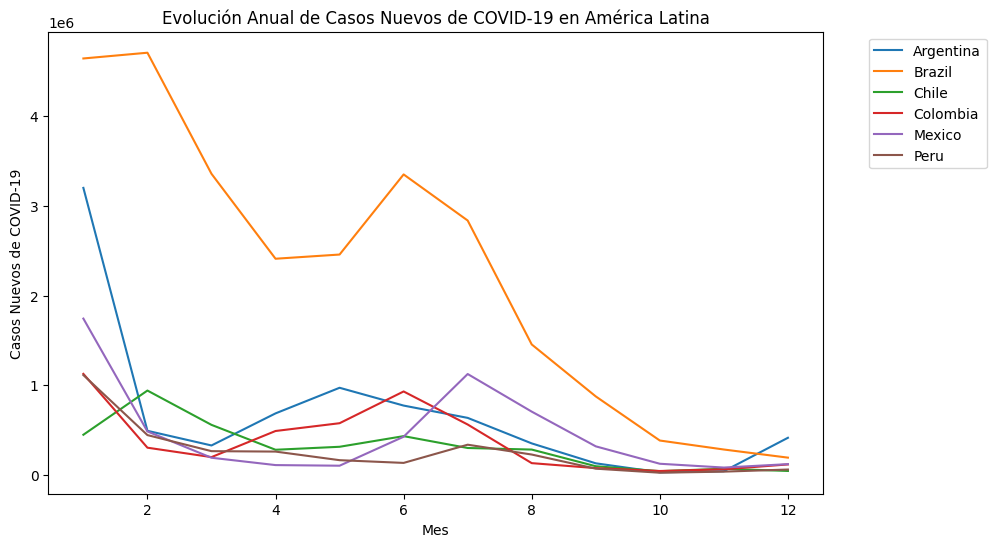

In [30]:
#Se crea una nueva columna llamada 'month' que contiene el número del mes correspondiente a cada fecha en el índice del DataFrame 
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
#Se agrupan los datos por país y mes, sumando los nuevos casos confirmados de cada mes para obtener un total mensual de casos.
yearly_cases = data_latinoamerica_paises.groupby(['country_name', 'month'])[['new_confirmed']].sum().reset_index()
#Se crea un gráfico de líneas donde cada línea representa la evolución mensual de los nuevos casos confirmados de Covid-19 para un país específico en América Latina.
plt.figure(figsize=[10, 6])
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)
#Se añaden etiquetas al eje x y al eje y, así como un título al gráfico.
plt.xlabel('Mes')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

8. Distribucion de la poblacion por edad en paises de America Latina

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


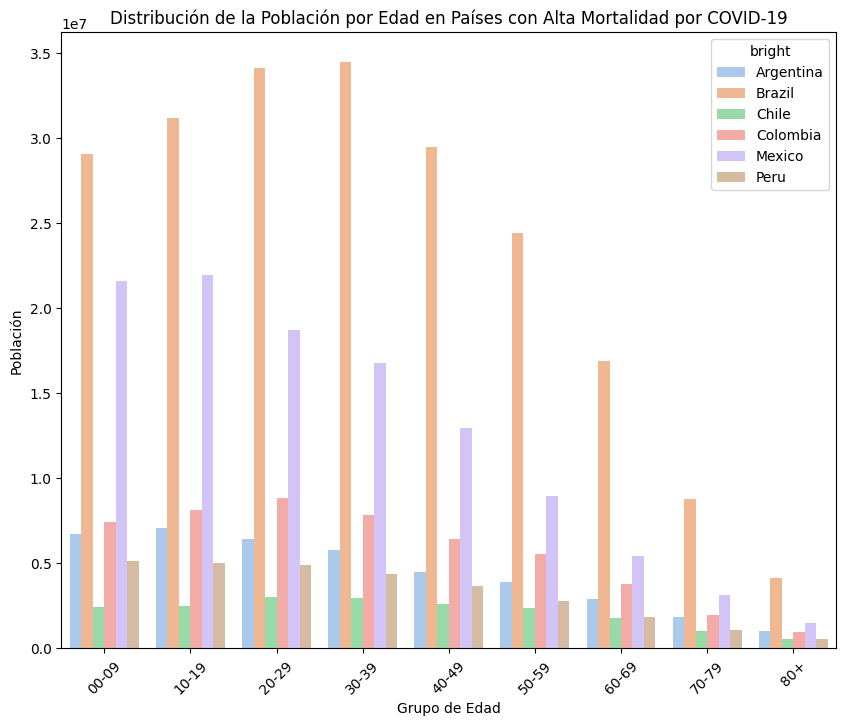

In [60]:
# Definir las columnas de edades
# Definir las columnas de edades
age_columns = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
    'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
    'population_age_80_and_older'
]

# Calcular la tasa de mortalidad
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] * 100

# Filtrar países con alta mortalidad (definir umbral, por ejemplo 2%)
high_mortality_threshold = 2
high_mortality_countries = data_latinoamerica_paises[data_latinoamerica_paises['mortality_rate'] > high_mortality_threshold]['country_name'].unique()

# Filtrar el dataframe para incluir solo estos países
data_latinoamerica_paises_high_mortality = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)]

# Calcular la media de la distribución de población por edad para estos países
age_distribution = data_latinoamerica_paises_high_mortality.groupby('country_name')[age_columns].mean()

# Preparar los datos para el gráfico
age_distribution = age_distribution.reset_index()
age_distribution = pd.melt(age_distribution, id_vars='country_name', value_vars=age_columns, var_name='age_group', value_name='population')

# Cambiar los nombres de los grupos de edad para mejor visualización
age_distribution['age_group'] = age_distribution['age_group'].apply(lambda x: x.replace('population_age_', '').replace('_and_older', '+').replace('_', '-'))

# Graficar la distribución de la población por edad
plt.figure(figsize=(10, 8))

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("pastel", len(high_mortality_countries))

sns.barplot(data=age_distribution, x='age_group', y='population', hue='country_name', palette=custom_palette)
plt.title('Distribución de la Población por Edad en Países con Alta Mortalidad por COVID-19')
plt.xlabel('Grupo de Edad')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend(title='bright')
plt.show()


9. Comparacion de estrategias de vacunacion en America Latina

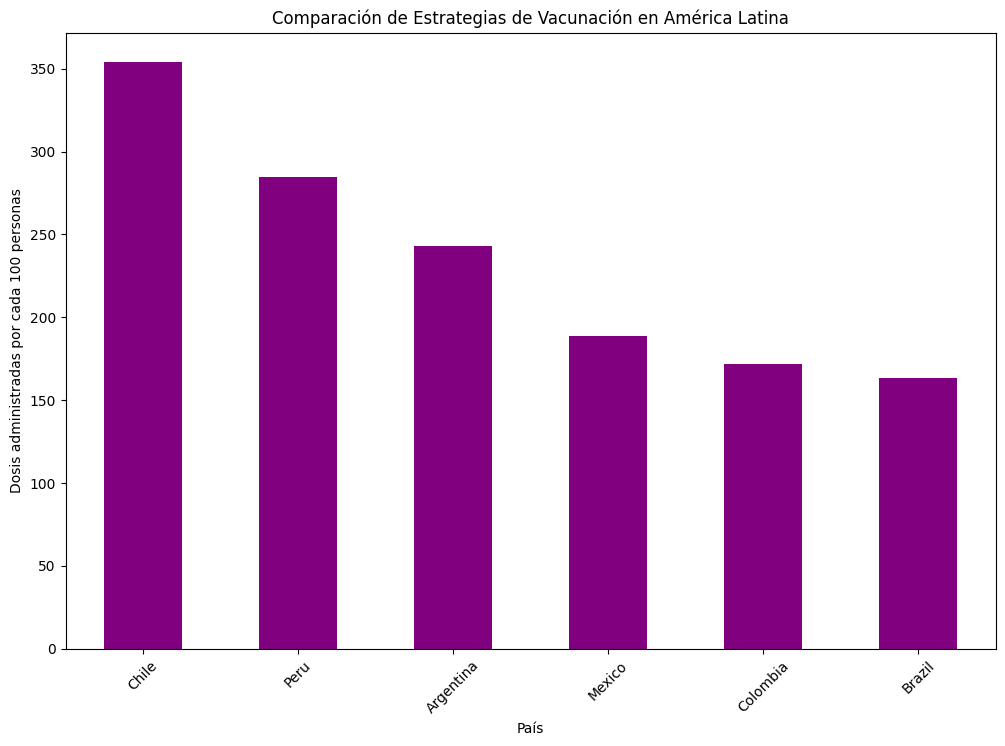

In [63]:
# Calcular el porcentaje de población vacunada (suponiendo que 'cumulative_vaccine_doses_administered' representa dosis administradas)
vaccination_str=data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() * 100
vaccination_str.sort_values(ascending=False).plot(kind='bar', figsize=(12,8), color='purple')

# Graficar la comparación de estrategias de vacunación
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.xlabel('País')
plt.ylabel('Dosis administradas por cada 100 personas')
plt.xticks(rotation=45)
plt.show()

In [64]:
data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index

Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [65]:
data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

10. Evolucion de numero de muertes diarias

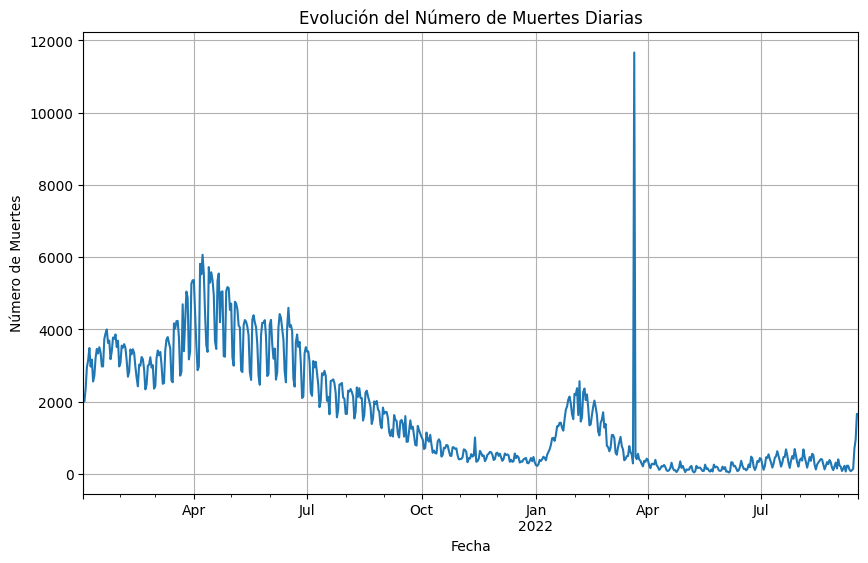

In [14]:

# Convertir la columna de fechas al tipo de dato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Agrupar por fecha y sumar el número de muertes diarias
muertes_diarias = data_latinoamerica_paises.groupby('date')['new_deceased'].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
muertes_diarias.plot(kind='line')
plt.title('Evolución del Número de Muertes Diarias')
plt.xlabel('Fecha')
plt.ylabel('Número de Muertes')
plt.grid(True)
plt.show()


11. Prevalencia de condiciones preexistentes en paises con altas y bajas tasas de mortalidad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10436\2670946443.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


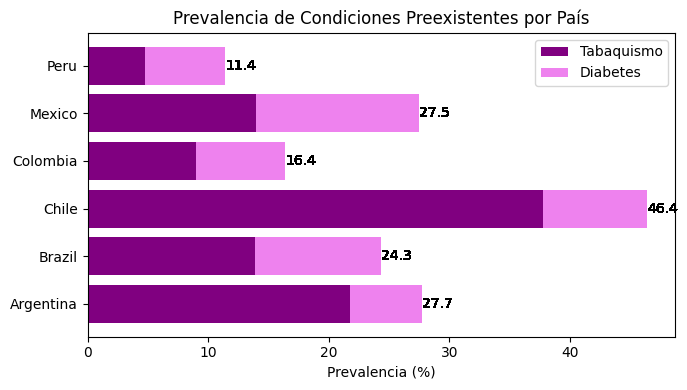

In [23]:
#Se seleccionan los cinco países con el mayor número acumulado de fallecidos (cumulative_deceased) y los cinco países con el menor número acumulado de fallecidos en el dataset 
top_countries=data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
botton_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
#Se filtran los datos para incluir solo los países que están en la lista de países principales y países inferiores obtenida anteriormente.
conditions_data=data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(botton_countries))]

# Configurar el tamaño de la figura
plt.figure(figsize=(7, 4))

# Gráfico de barras apiladas
bars_high = plt.barh(conditions_data['country_name'], conditions_data['smoking_prevalence'], color='purple', label='Tabaquismo')
bars_low = plt.barh(conditions_data['country_name'], conditions_data['diabetes_prevalence'], left=conditions_data['smoking_prevalence'], color='violet', label='Diabetes')
#Se añaden etiquetas al eje x y un título al gráfico.Se muestra la leyenda que indica los colores asociados a tabaquismo y diabetes.
plt.xlabel('Prevalencia (%)')
plt.title('Prevalencia de Condiciones Preexistentes por País')
plt.legend()

# Añadir etiquetas de tasa de mortalidad a la derecha de las barras
for bar in bars_low:
    width = bar.get_width() + bar.get_x()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

plt.tight_layout()
plt.show()


Los países con los mayores números de fallecidos por Covid-19 tienden a mostrar mayores prevalencias de una o ambas condiciones preexistentes (tabaquismo y diabetes). Esto puede indicar que estas condiciones están contribuyendo a una mayor gravedad y mortalidad en estos países.

12. Variacion mensual de casos y muertes

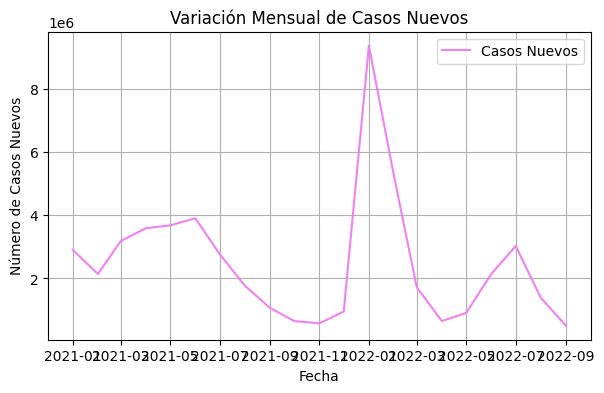

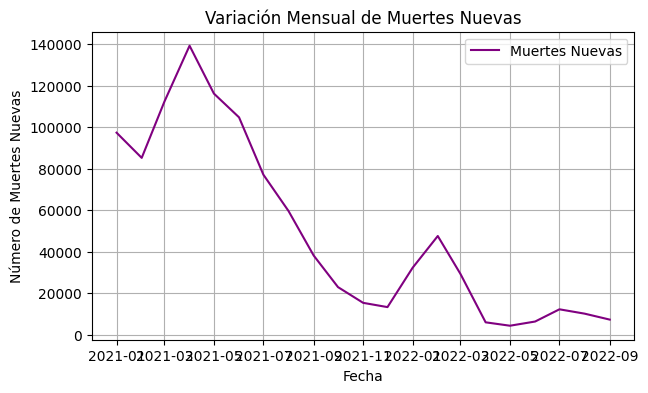

In [22]:
# Convertir la columna 'date' a formato de fecha
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'], errors='coerce')

# Eliminar filas con fechas inválidas si hay alguna
data_latinoamerica_paises = data_latinoamerica_paises.dropna(subset=['date'])

# Extraer el año y el mes
data_latinoamerica_paises['year_month'] = data_latinoamerica_paises['date'].dt.to_period('M')

# Agrupar por año y mes y sumar los casos nuevos y muertes
monthly_data = data_latinoamerica_paises.groupby('year_month').agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum'
}).reset_index()

# Convertir 'year_month' a una fecha representativa para graficar
monthly_data['year_month'] = monthly_data['year_month'].dt.to_timestamp()

# Crear la gráfica de casos nuevos
plt.figure(figsize=(7, 4))
plt.plot(monthly_data['year_month'], monthly_data['new_confirmed'], label='Casos Nuevos', color='violet')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos Nuevos')
plt.title('Variación Mensual de Casos Nuevos')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica de muertes
plt.figure(figsize=(7, 4))
plt.plot(monthly_data['year_month'], monthly_data['new_deceased'], label='Muertes Nuevas', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Número de Muertes Nuevas')
plt.title('Variación Mensual de Muertes Nuevas')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8348\157761792.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)


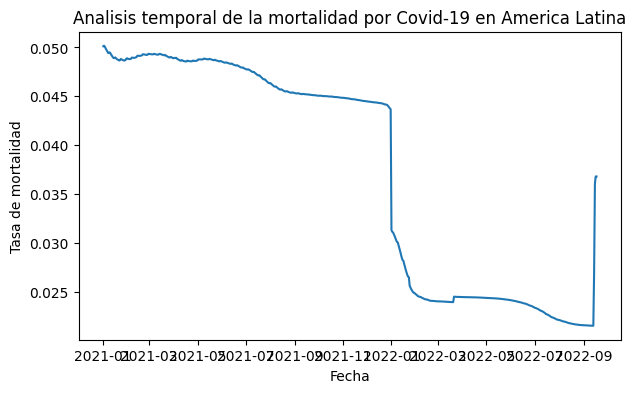

In [34]:
data_latinoamerica_paises['mortality_rate']=data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(7,4))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Analisis temporal de la mortalidad por Covid-19 en America Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de mortalidad')
plt.show()

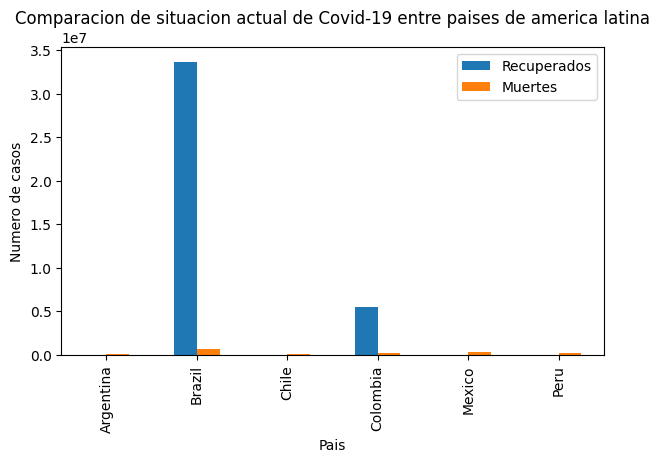

In [51]:
current_situation = data_latinoamerica_paises.groupby('country_name').max()[['cumulative_recovered','cumulative_deceased']]
current_situation.plot(kind='bar',stacked=False, figsize=(7,4))
plt.title('Comparacion de situacion actual de Covid-19 entre paises de america latina')
plt.xlabel('Pais')
plt.ylabel('Numero de casos')
plt.legend(['Recuperados','Muertes'])
plt.show()